In [68]:
import numpy as np
import matplotlib.pyplot as plt



In [16]:
resArray = range(200,1700,200) #range(200,1700,107) #range(200,1700,70) 
# percentage blood volume (perc) UNIT: %
percArray = range(10,120,20) #REMEMBER IT WILL BE DIVIDED BY 10 110
#T1 of tissue compartment (t1t) UNIT: ms
t1tArray = range(1000,2200,400) #range(700,1700,69) 
#T1 of blood compartment (t1b) UNIT: ms
t1bArray = range(1500,2100,400) #range(1540,1940,27) 
# multiplication factor for the B1 value (multi)
multiArray = range(80, 130, 20) #100
# T2 of tissue compartment UNIT: ms
t2tArray = range(38,157,30)
# T2 of blood compartment UNIT: ms
t2bArray = range(55, 385, 220)
if t2tArray[-1] > 112:
    t2tArray= list(t2tArray)
    t2tArray[-1] = 112

print(list(resArray))
print(list(percArray))
print(list(t1tArray))
print(list(t1bArray))
print(list(multiArray))
print(list(t2tArray))
print(list(t2bArray))

[200, 400, 600, 800, 1000, 1200, 1400, 1600]
[10, 30, 50, 70, 90, 110]
[1000, 1400, 1800]
[1500, 1900]
[80, 100, 120]
[38, 68, 98, 112]
[55, 275]


In [3]:
match = np.load('DictionaryDiscard/echo_1000_1500_200_1.0_0.8_50.npy')
print(match.shape)

print(np.mean(match[:,49,2]))

(1000, 50, 50)
22.238952624538403


In [1]:
a = np.load('DictionaryDiscard/echo_1000_1500_200_1.0_0.8_50.npy')
print(a.shape)
dict = a[:,0,0]
np.save('DictionaryDiscard/echo_1000_1500_200_1.0_0.8_1.npy',dict)
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(a[:,0,0])
axs[1].plot(a[:,1,0])
print(np.std(a[:,0,0]-a[:,6,0]))
print(np.mean(a[:,0,0]))


NameError: name 'np' is not defined

In [13]:
b = np.abs(a)
(a==b).all()


False

In [15]:
import numpy as np

# Create a sample array
a = np.random.rand(1000, 2)

# Timing Expression 1
time1 = %timeit -o np.linalg.norm(a, axis=1)

# Timing Expression 2
time2 = %timeit -o np.sqrt((a[:,0])**2 + (a[:,1])**2)

# Print the results
print(f"Expression 1 time: {time1.average} seconds")
print(f"Expression 2 time: {time2.average} seconds")

7.78 µs ± 277 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.43 µs ± 262 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Expression 1 time: 7.775712201428177e-06 seconds
Expression 2 time: 2.433875534285497e-06 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sequences
sequence_test1 = np.load('DictionaryDiscard/echo_233_122_112_43_1_2.0_1.22_1.npy')
print(sequence_test1.shape)

no_noise =  sequence_test1[:,0]
noise_one =  sequence_test1[:,3]
difference = (no_noise-noise_one)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot sequence_test1
axs[0].plot(no_noise)

# Plot sequence_test2
axs[0].plot(noise_one[:])


# Plot the difference
axs[1].plot(difference)
axs[1].set_title('Difference (Sequence Test 1 - Sequence Test 2)')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Difference')

# Adjust layout
plt.tight_layout()
plt.show()

print(np.std(difference))
print(np.mean((no_noise)/10000)*100)


FileNotFoundError: [Errno 2] No such file or directory: 'DictionaryDiscard/echo_233_122_112_43_1_2.0_1.22_1.npy'

In [69]:
# Load the sequences
sequence_test1 = np.load('DictionaryDiscard/echo_233_122_112_43_1_2.0_1.22_1.npy')
print(sequence_test1.shape)

no_noise =  sequence_test1[:,0]
noise_one =  sequence_test1[:,8]
difference = (no_noise-noise_one)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot sequence_test1
axs[0].plot(no_noise)

# Plot sequence_test2
axs[0].plot(noise_one[:])


# Plot the difference
axs[1].plot(difference)
axs[1].set_title('Difference (Sequence Test 1 - Sequence Test 2)')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Difference')

# Adjust layout
plt.tight_layout()
plt.show()

print(np.std(difference))
print(np.mean((no_noise)/10000)*100)

(2000, 1)


IndexError: index 8 is out of bounds for axis 1 with size 1

In [3]:
a = 3/10000
a*=100
a

0.03

[]

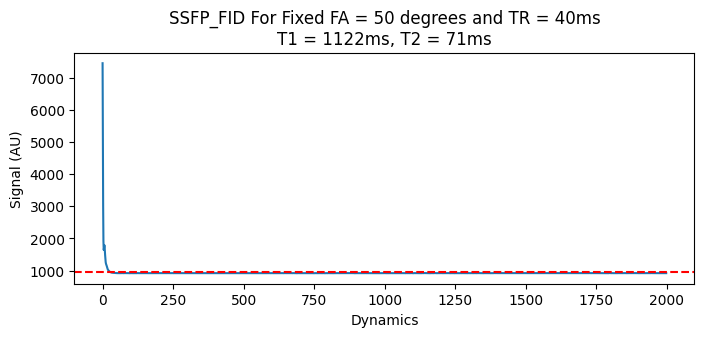

In [2]:
sequence_test1 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP/echo_1122_1122_71_71_200_5.0_1.0_1.npy')
plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(sequence_test1, label = 'Bloch Simulation') # divide by 10000 to obtain same scale as Jiang paper (normalised)

plt.axhline(y=948.1175143936051, color='r', linestyle='--', label = 'Theoretical Steady State')
plt.title('SSFP_FID For Fixed FA = 50 degrees and TR = 40ms\nT1 = 1122ms, T2 = 71ms')

plt.ylabel('Signal (AU)')
plt.xlabel('Dynamics')
#plt.legend()
plt.plot()


In [9]:
def calcSteadyStateMean(signal, gradient_threshold, plot = False, print_info = False):
    """
    Calculates the mean of the 'flat' part of the MRI signal.
    The 'flatness' of the curve is determined by the differential.
    """
    # ensure that the sequence is flattened
    signal = signal.flatten()
    
    # calculate the numerical gradient of the sequence
    gradient = np.gradient(signal, 1) # spacing between values is 1

    # find indices where the gradient is below the steady state threshold
    steadystate_indices = np.where(np.abs(gradient) < gradient_threshold)[0]

    # notify if there is no steady state found
    if len(steadystate_indices) == 0:
        raise ValueError("No steady state found based on the gradient threshold.")
    
    # extract steady state
    steadystate_values = signal[steadystate_indices[0]:steadystate_indices[-1]+1] # plus one to include the edge case

    # Calculate the average of the flat region
    steadystate_avg = np.mean(steadystate_values)

    if plot == True:
        plt.plot(signal, label='Signal')
        plt.axvline(x=steadystate_indices[0], color='r', linestyle='--', label='Start of Steady State')
        plt.axvline(x=steadystate_indices[-1]+1, color='b', linestyle='--', label='End of Steady State')
        plt.legend()
        plt.xlabel('Dynamics')
        plt.ylabel('Signal (AU)')
        plt.title('MR Signal with Steady State Region Calculated')
        plt.show()

    if print_info == True:
        print(f"Steady-state starts at index {steadystate_indices[0]} and ends at index {steadystate_indices[-1]+1}")
        print(f"Average value of steady state: {steadystate_avg:.2f}")

    return steadystate_avg


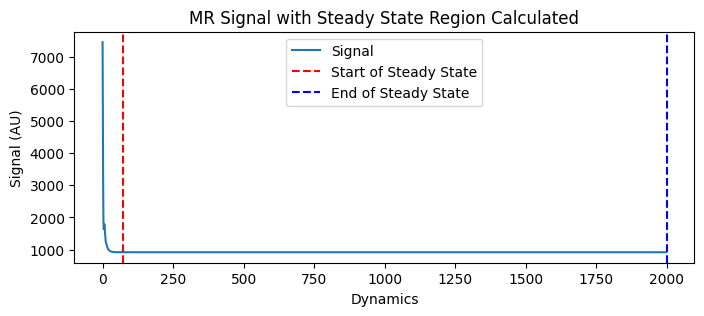

Steady-state starts at index 72 and ends at index 2000
Average value of steady state: 918.77


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Example signal - replace this with your actual signal data
signal = np.copy(sequence_test1)  # replace with your signal data

steadystate_avg = calcSteadyStateMean(signal, gradient_threshold=0.01, plot = True, print_info = True)

In [2]:
def percentage_of_signal_differences(lowsignal, highsignal, M0):
    diff = abs(highsignal-lowsignal)
    diff *= 1/M0
    diff *= 100
    return diff

# ISMRM Plot

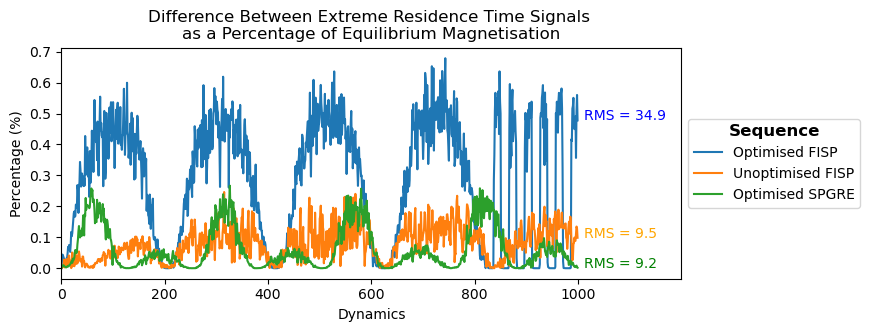

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False



original_FISP_low_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_orig/echo_1122_1627_71_165_200_5.0_1.0_1.npy')
original_FISP_high_RT =np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_orig/echo_1122_1627_71_165_1600_5.0_1.0_1.npy')
optim_FISP_low_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM_B1/echo_1122_1627_71_165_200_5.0_1.0_1.npy')
optim_FISP_high_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM_B1/echo_1122_1627_71_165_1600_5.0_1.0_1.npy')
spgre_low_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionarySPGRE_Emma_Variation_WEX/echo_1122_1627_200_5.0_1.0_1_original.npy')
spgre_high_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionarySPGRE_Emma_Variation_WEX/echo_1122_1627_1600_5.0_1.0_1_original.npy')
diff_optim = percentage_of_signal_differences(optim_FISP_low_RT, optim_FISP_high_RT, 10000)
diff_orig = percentage_of_signal_differences(original_FISP_low_RT, original_FISP_high_RT, 10000)
diff_spgre = percentage_of_signal_differences(spgre_low_RT, spgre_high_RT, 10000)[:1000]

spgre_1000_rmse = root_mean_squared_error(spgre_low_RT[:1000], spgre_high_RT[:1000])

x = np.arange(len(original_FISP_low_RT))
plot_colors = ['hotpink','darkviolet','mediumblue']
plt.rcParams['figure.figsize'] = [8, 3]
plt.plot(diff_optim, label = 'Optimised FISP')
plt.plot(diff_orig, label = 'Unoptimised FISP')
plt.plot(diff_spgre, label = 'Optimised SPGRE')
plt.xlabel('Dynamics')
plt.ylabel('Percentage (%)')
plt.title('Difference Between Extreme Residence Time Signals \nas a Percentage of Equilibrium Magnetisation')
leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)
leg.set_title('Sequence', prop={'size': 12, 'weight':'bold'})
#plt.plot(optim_FISP_low_RT - optim_FISP_high_RT)
plt.grid(False)
# Add labels next to the corresponding plot lines
plt.xlim((0,1200))
plt.annotate('RMS = 34.9', xy=(x[-1], diff_optim[-1]), xytext=(5, 0), textcoords='offset points', color='blue')
plt.annotate('RMS = 9.5', xy=(x[-1], diff_orig[-1]), xytext=(5, 0), textcoords='offset points', color='orange')
plt.annotate(f'RMS = {spgre_1000_rmse :.1f}', xy=(x[-1], diff_spgre[-1]), xytext=(5, 0), textcoords='offset points', color='green')


# Set x-tick labels
ax = plt.gca()
ax.set_xticks(np.arange(0, 1001, 200))  # Set x-ticks at intervals of 200 up to 1000
ax.set_xticklabels(np.arange(0, 1001, 200))  # Set x-tick labels to match the x-ticks

plt.show()



### Upgrade plot

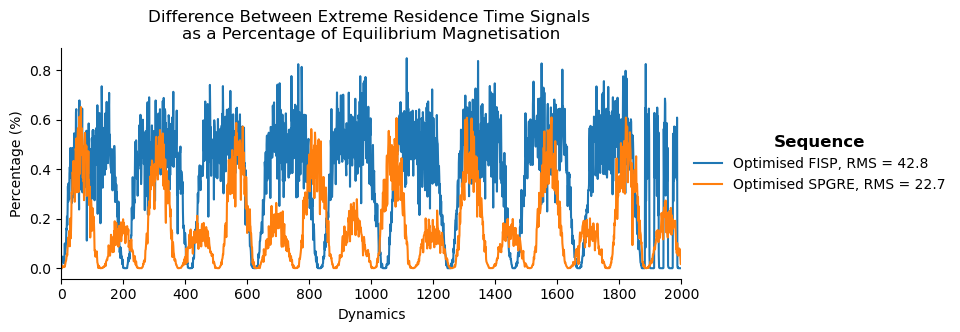

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False


optim_FISP_low_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryUpgradeComparison/echo_1122_1627_71_165_200_5.0_1.0_1.npy')
optim_FISP_high_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryUpgradeComparison/echo_1122_1627_71_165_1600_5.0_1.0_1.npy')
spgre_low_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryUpgradeComparison/echo_1122.0_1627.0_200.0_5.0_1.0_1.npy')
spgre_high_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryUpgradeComparison/echo_1122.0_1627.0_1600.0_5.0_1.0_1.npy')

# need to take signal magnitude
optim_FISP_low_RT = np.sqrt((optim_FISP_low_RT[:,0])**2 + (optim_FISP_low_RT[:,1])**2)
optim_FISP_high_RT = np.sqrt((optim_FISP_high_RT[:,0])**2 + (optim_FISP_high_RT[:,1])**2)
spgre_low_RT = np.sqrt((spgre_low_RT[:,0])**2 + (spgre_low_RT[:,1])**2)
spgre_high_RT = np.sqrt((spgre_high_RT[:,0])**2 + (spgre_high_RT[:,1])**2)

diff_optim = percentage_of_signal_differences(optim_FISP_low_RT, optim_FISP_high_RT, 10000)
diff_spgre = percentage_of_signal_differences(spgre_low_RT, spgre_high_RT, 10000)

FISP_RMSE = root_mean_squared_error(optim_FISP_low_RT, optim_FISP_high_RT)
spgre_RMSE = root_mean_squared_error(spgre_low_RT, spgre_high_RT)

x = np.arange(len(optim_FISP_low_RT))
plot_colors = ['hotpink','darkviolet','mediumblue']
plt.rcParams['figure.figsize'] = [8, 3]
plt.plot(diff_optim, label = f'Optimised FISP, RMS = {FISP_RMSE :.1f}')
plt.plot(diff_spgre, label = f'Optimised SPGRE, RMS = {spgre_RMSE :.1f}')
plt.xlabel('Dynamics')
plt.ylabel('Percentage (%)')
plt.title('Difference Between Extreme Residence Time Signals \nas a Percentage of Equilibrium Magnetisation')
leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
leg.set_title('Sequence', prop={'size': 12, 'weight':'bold'})
#plt.plot(optim_FISP_low_RT - optim_FISP_high_RT)
plt.grid(False)
# Add labels next to the corresponding plot lines
plt.xlim((0,2000))


# Set x-tick labels
ax = plt.gca()
ax.set_xticks(np.arange(0, 2001, 200))  # Set x-ticks at intervals of 200 up to 1000
ax.set_xticklabels(np.arange(0, 2001, 200))  # Set x-tick labels to match the x-ticks
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.show()

In [24]:
FISP_RMSE

0.007598015873729158

In [25]:
spgre_RMSE

0.006458234069678282

Text(0, 0.5, 'Signal (a.u.)')

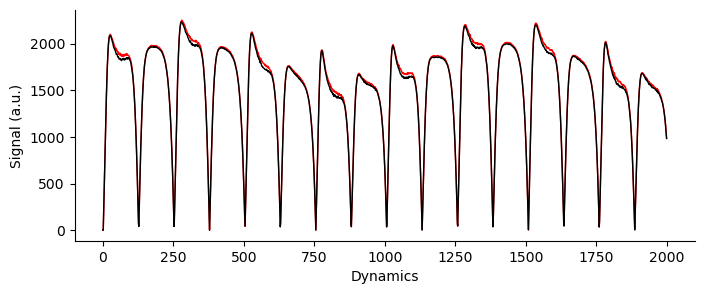

In [26]:
plt.plot(spgre_low_RT, linewidth=1, color='red')
plt.plot(spgre_high_RT, linewidth=1, color='black')
plt.xlabel('Dynamics')
plt.ylabel('Signal (a.u.)')


Text(0, 0.5, 'Signal (a.u.)')

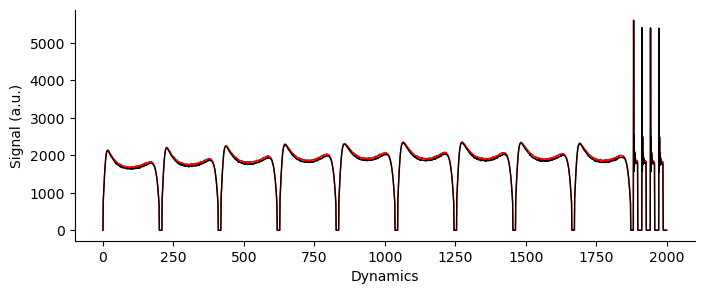

In [27]:
plt.plot(optim_FISP_low_RT, linewidth=1, color='red')
plt.plot(optim_FISP_high_RT, linewidth=1, color='black')
plt.xlabel('Dynamics')
plt.ylabel('Signal (a.u.)')

In [8]:
optim_FISP_low_RT.shape

(2000, 2)

0.8
1.0
1.2


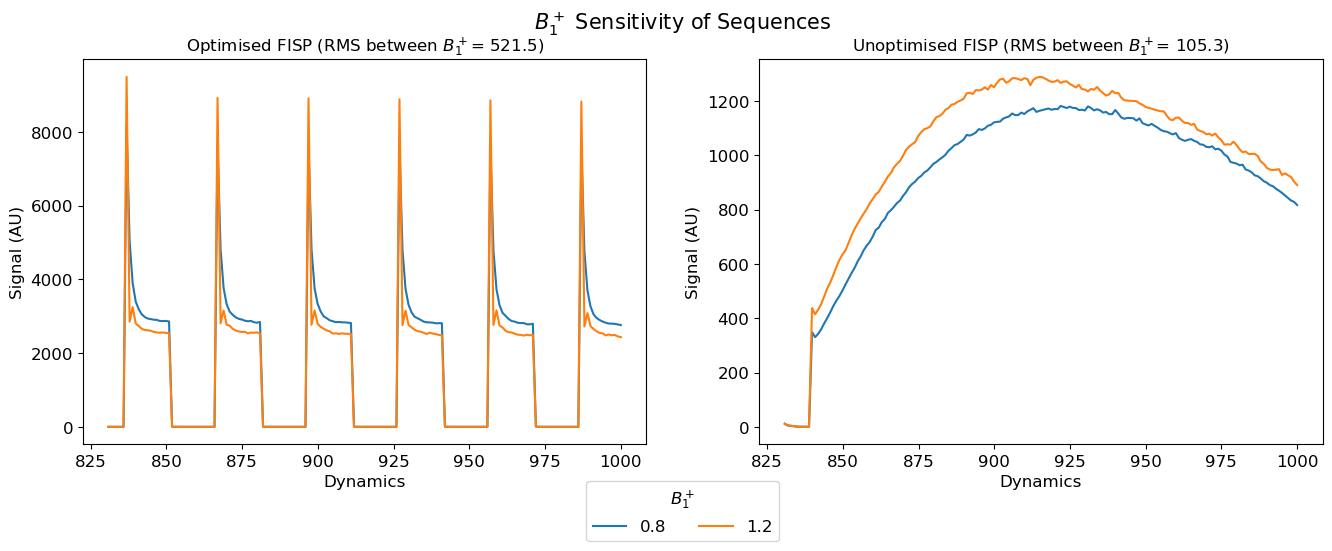

521.4971183331637


In [26]:
# plot sensitivity to B1
import numpy as np
import matplotlib.pyplot as plt
parent_folder = '/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_ISMRM/'
optim_FISP_low_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM_B1/echo_1122_1627_71_165_200_5.0_1.0_1.npy')
b1s = [0.8,1.0,1.2]
signals = np.zeros((1000, len(b1s)))
count = 0
for b1 in b1s:
    signal_raw = np.load(f'/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_ISMRM/echo_1400_1500_68_165_200_9.0_{b1}_1.npy')
    # take magnitude of signal
    signals[:,count] = np.sqrt((signal_raw[:,0])**2 + (signal_raw[:,1])**2)
    print(b1)
    count += 1

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5, forward=True)
x = np.linspace(0,1000, len(signals[:,0]))
ax1.plot(x[830:1000],signals[830:1000,0], label = '0.8')
ax1.plot(x[830:1000],signals[830:1000,2], label = '1.2')
ax1.set_xlabel('Dynamics', fontsize = 12)
ax1.set_ylabel('Signal (AU)', fontsize = 12)
ax1.set_title(f'Optimised FISP (RMS between $B_1^+$= 521.5)',  fontsize = 12)
# Add labels next to the corresponding plot lines



x = np.linspace(0,1000, len(signalsb[:,0]))
ax2.plot(x[830:1000],signalsb[830:1000,0], label = '0.8')
ax2.plot(x[830:1000],signalsb[830:1000,2], label = '1.2')
ax2.set_xlabel('Dynamics', fontsize = 12)
ax2.set_ylabel('Signal (AU)', fontsize = 12)
ax2.set_title(f'Unoptimised FISP (RMS between $B_1^+$= 105.3)')
handles, labels = ax.get_legend_handles_labels()
legend = fig.legend([0.8, 1.2], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize = 12)
fig.suptitle(f'$B_1^+$ Sensitivity of Sequences', fontsize=15)
legend.set_title(f'$B_1^+$', prop={'size': 12, 'weight':'bold'})
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
plt.show()
print(root_mean_squared_error(signals[830:1000,0], signals[830:1000,2]))



0.8
1.0
1.2


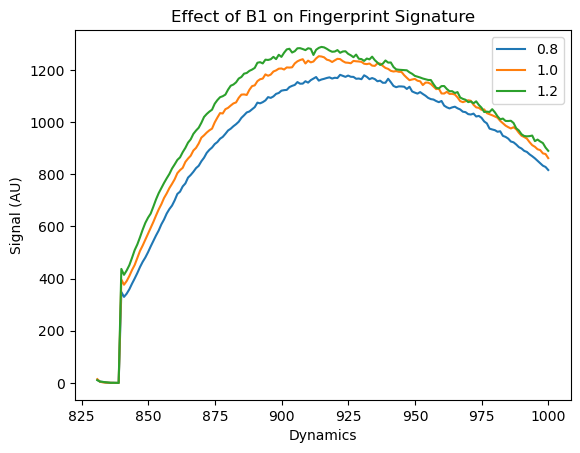

521.4971183331637


In [2]:
# plot sensitivity to B1
import numpy as np
from sklearn.metrics import root_mean_squared_error
b1s = [0.8,1.0,1.2]
signalsb = np.zeros((1000, len(b1s)))
count = 0
for b1 in b1s:
    signalsb[:,count]= np.squeeze(np.load(f'/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig/echo_1400_1500_68_165_200_9.0_{b1}_1.npy'))
    # take magnitude of signal
    print(b1)
    count += 1
x = np.linspace(0,1000, len(signalsb[:,0]))
plt.plot(x[830:1000],signalsb[830:1000,0], label = '0.8')
plt.plot(x[830:1000],signalsb[830:1000,1], label = '1.0')
plt.plot(x[830:1000],signalsb[830:1000,2], label = '1.2')
plt.rcParams['figure.figsize'] = [5, 5]
plt.xlabel('Dynamics')
plt.ylabel('Signal (AU)')
plt.title('Effect of B1 on Fingerprint Signature')
ax = plt.gca()  # Set x-tick labels to match the x-ticks
plt.legend()
plt.show()

print(root_mean_squared_error(signals[830:1000,0], signals[830:1000,2]))


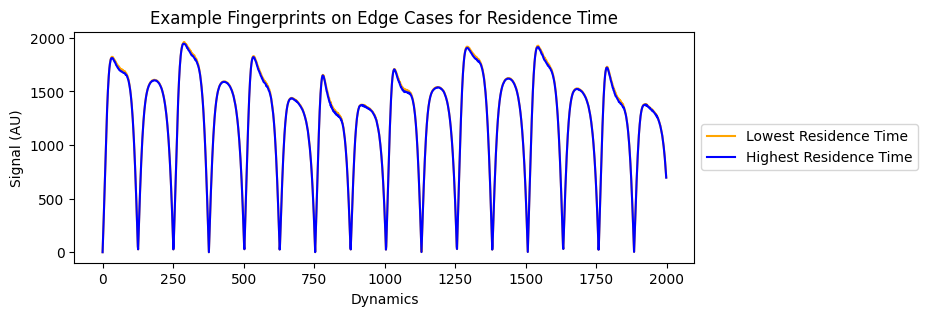

In [18]:
low_RT= np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionarySPGRE_Emma_Variation_WEX/echo_1122_1627_200_5.0_1.0_1_original.npy')
high_RT = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionarySPGRE_Emma_Variation_WEX/echo_1122_1627_1600_5.0_1.0_1_original.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(low_RT, label='Lowest Residence Time', color = 'orange') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(high_RT, label='Highest Residence Time', color = '#0000ff') 
plt.title('Example Fingerprints on Edge Cases for Residence Time')
plt.ylabel('Signal (AU)') 
plt.xlabel('Dynamics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [2]:
low_B1 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM_B1/echo_1122_1627_71_165_200_5.0_0.7_1.npy')
high_B1 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM_B1/echo_1122_1627_71_165_200_5.0_1.2_1.npy')
mid_B1 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM_B1/echo_1122_1627_71_165_200_5.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(low_B1, label='Lowest B1', color = 'orange') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(high_B1, label='Highest B1', color = '#0000ff') 
plt.title('Example Fingerprints on Edge Cases for B1')
plt.ylabel('Signal (AU)') 
plt.xlabel('Dynamics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

NameError: name 'np' is not defined

5.547392156622619


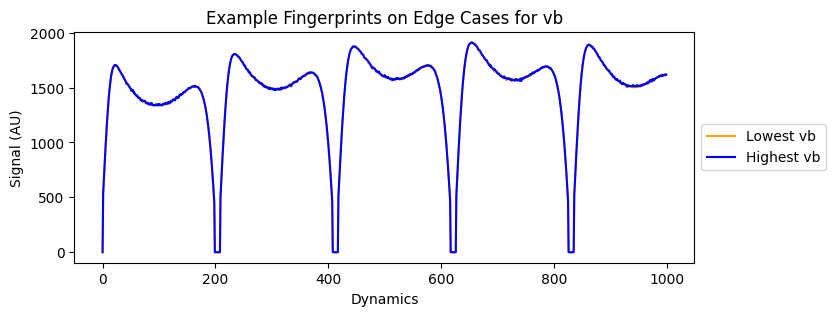

In [10]:
low_vb = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM/echo_1122_1940_71_165_200_5.0_1.0_1.npy')
high_vb = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM/echo_1122_1540_71_165_200_5.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(low_vb, label='Lowest vb', color = 'orange') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(high_vb, label='Highest vb', color = '#0000ff') 
plt.title('Example Fingerprints on Edge Cases for vb')
plt.ylabel('Signal (AU)') 
plt.xlabel('Dynamics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(low_vb,high_vb))

In [16]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(low_RT,high_RT)

9.184629035841963

61.652366196428865


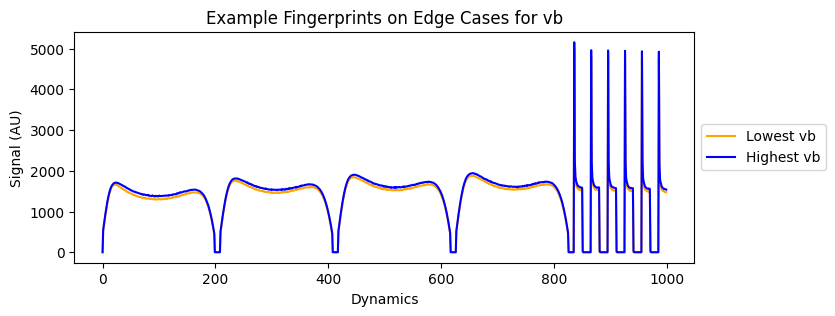

In [4]:
low_T2t = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM_B1/echo_1122_1672_38_165_200_5.0_1.0_1.npy')
high_T2t = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_WEX_OPTIM_B1/echo_1122_1672_112_165_200_5.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(low_T2t, label='Lowest vb', color = 'orange') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(high_T2t, label='Highest vb', color = '#0000ff') 
plt.title('Example Fingerprints on Edge Cases for vb')
plt.ylabel('Signal (AU)') 
plt.xlabel('Dynamics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(low_T2t,high_T2t))

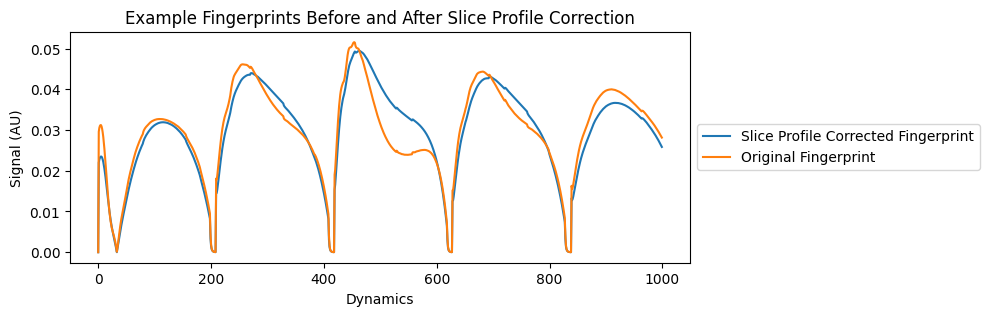

In [3]:
sequence_FISP_slice_profile = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig/echo_700_700_85_85_1600_0.0_1.0_1.npy')
sequence_FISP_slice_profile = sequence_FISP_slice_profile/np.linalg.norm(sequence_FISP_slice_profile)
sequence_FISP_original = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig/echo_700_700_85_85_1600_0.0_1.0_1_original_fisp.npy')
sequence_FISP_original = sequence_FISP_original/np.linalg.norm(sequence_FISP_original)

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(sequence_FISP_slice_profile, label='Slice Profile Corrected Fingerprint') 
plt.plot(sequence_FISP_original, label='Original Fingerprint')


plt.title('Example Fingerprints Before and After Slice Profile Correction')
plt.ylabel('Signal (AU)') 
plt.xlabel('Dynamics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


https://iopscience.iop.org/article/10.1088/0031-9155/32/8/002/pdf McRobbie paper showing slice profile as a function of flip angle correction

In [30]:
print(sequence_FISP_half_slice_profile[:10])
print('----')
print(sequence_FISP_original[:10]/2)

[[5.98083970e-13]
 [5.25166260e+02]
 [5.42068489e+02]
 [5.50614700e+02]
 [5.54031783e+02]
 [5.55278284e+02]
 [5.48492538e+02]
 [5.37438966e+02]
 [5.21322947e+02]
 [5.02055061e+02]]
----
[[5.98083970e-13]
 [5.25166260e+02]
 [5.42132607e+02]
 [5.49942276e+02]
 [5.54066502e+02]
 [5.54337177e+02]
 [5.49537367e+02]
 [5.37701098e+02]
 [5.21453046e+02]
 [5.02434677e+02]]


In [13]:
print(-np.sqrt(np.mean((sequence_T1_750b - sequence_T1_700a) ** 2)) )

NameError: name 'sequence_T1_750b' is not defined

Text(0, 0.5, 'Time (ms)')

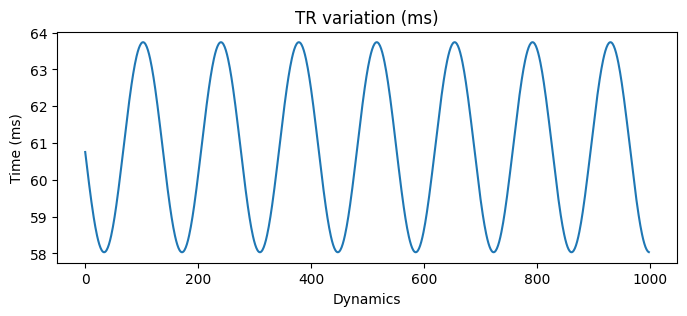

In [41]:
plt.rcParams['figure.figsize'] = [8, 3]
optimtr = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/coreSimulations/functions/holdArrays/trArray_25.npy')
simtr = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/coreSimulations/functions/holdArrays/trArray_3.npy')
plt.plot(optimtr[1:], label = 'optim')
#plt.plot(simtr[1:], label = 'sim')
#plt.legend()
plt.title('TR variation (ms)')
plt.xlabel('Dynamics')
plt.ylabel('Time (ms)')
#print(np.mean(optimtr-simtr))



Text(0, 0.5, 'Angle')

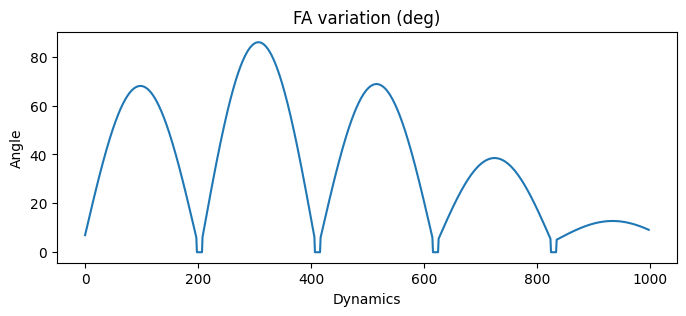

In [42]:
plt.rcParams['figure.figsize'] = [8, 3]
optim = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/coreSimulations/functions/holdArrays/faArray_25.npy')
#sim = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/coreSimulations/functions/holdArrays/faArray_3.npy')
#plt.plot(optim, label = 'optim')
plt.plot(optim[1:], label = 'sim')
plt.title('FA variation (deg)')
plt.xlabel('Dynamics')
plt.ylabel('Angle')
#plt.legend()
#print(np.mean(optim-sim))

In [23]:
from sklearn.metrics import mean_squared_error
print(-np.sqrt(mean_squared_error(sequence_T1_700, sequence_T1_750)))
a = np.load('DictionaryFISP/echo_700_700_85_85_200_1.0_1.0_1.npy')
b = np.load('DictionaryFISP/echo_750_750_85_85_200_1.0_1.0_1.npy')
print(-np.sqrt(mean_squared_error(sequence_T1_700,sequence_T1_750)))


-16.01241911614244
-16.01241911614244


In [21]:
#27.78843181  82.07712577 190.53361815  88.05766855 182.51782914
# 27.78843181  82.07712577 235.50622873  99.40441822 182.51782914

def sinusoidal_TR(TRmax, TRmin, freq, N):
    N_arr = np.linspace(0,N,num=N)
    trArray = (TRmax*np.sin(N_arr/freq)+(TRmax+TRmin))
    trArray[0] = 2909

     #Save array for calling in the main function later
    return trArray

def sinusoidal_FA(a_max, N, w_a):
    N_arr = np.array(range(N))

    #Sometimes a random variation is added to the flip angle to reduced 
    #effects of matching errors with inhomogeneous B1 fields 
    #Hence there is a random element that can be added (set currently to 0)
    faArray = np.squeeze(a_max*(np.abs(3*np.sin(N_arr/w_a)+(np.sin(N_arr/w_a)**2))) \
        +  np.random.uniform(0,0,[1,N]))
    
    # There may be a loss of SNR when the first flip angle is v low (e.g. 0.008)
    # so change the first flip angle to be a little higher
    faArray[0] = 180

    #Save array for calling in the main function later
    return faArray

trArray = sinusoidal_TR(182, 88, 235, 2000)
faArray = sinusoidal_FA(27.78843181, 2000,  82.07712577 )


trArray = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/coreSimulations/functions/holdArrays/trArray_5.npy')
faArray = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/coreSimulations/functions/holdArrays/faArray_5.npy')


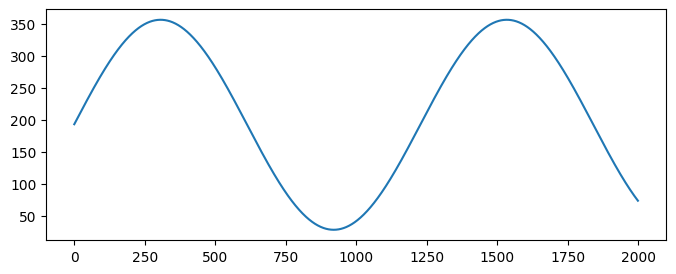

In [20]:
plt.plot(trArray[1:])

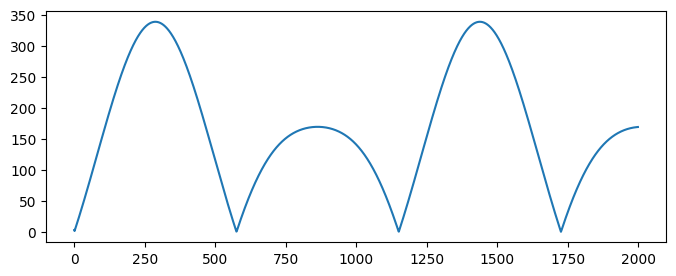

In [22]:
plt.plot(faArray)

1.8690744084912823e-16


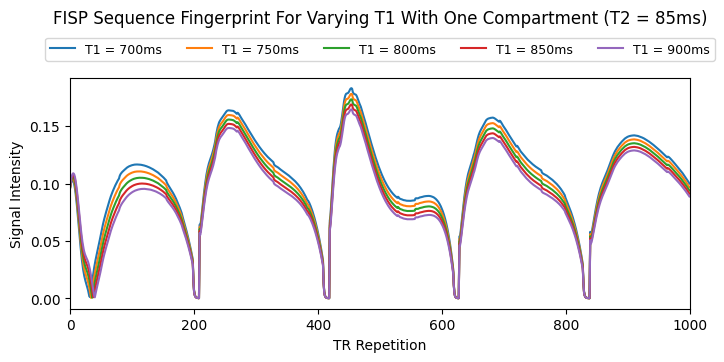

In [7]:
# Read in sequence data
sequence_T1_700 = np.load('DictionaryFISP/echo_700_700_85_85_200_1.0_1.0_1.npy')
sequence_T1_750 = np.load('DictionaryFISP/echo_750_750_85_85_200_1.0_1.0_1.npy')
sequence_T1_800 = np.load('DictionaryFISP/echo_800_800_85_85_200_1.0_1.0_1.npy')
sequence_T1_850 = np.load('DictionaryFISP/echo_850_850_85_85_200_1.0_1.0_1.npy')
sequence_T1_900 = np.load('DictionaryFISP/echo_900_900_85_85_200_1.0_1.0_1.npy')

sequence_T1_1000= np.load('DictionaryFISP/echo_1000_1000_100_100_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700/10000, label='T1 = 700ms') # divide by 10000 to obtain same scale as Jiang paper (normalised)

plt.plot(sequence_T1_750/10000, label='T1 = 750ms') 
plt.plot(sequence_T1_800/10000, label='T1 = 800ms') 
plt.plot(sequence_T1_850/10000, label='T1 = 850ms') 
plt.plot(sequence_T1_900/10000, label='T1 = 900ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms)', y=1.2)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.ylim = ([0,0.15])
plt.yticks([0,0.05, 0.1, 0.15])
plt.xlim([0,1000])

print(np.min(sequence_T1_1000/10000))

# Investigate the effects of changing TE on the original sequence 

(0.0, 1000.0)

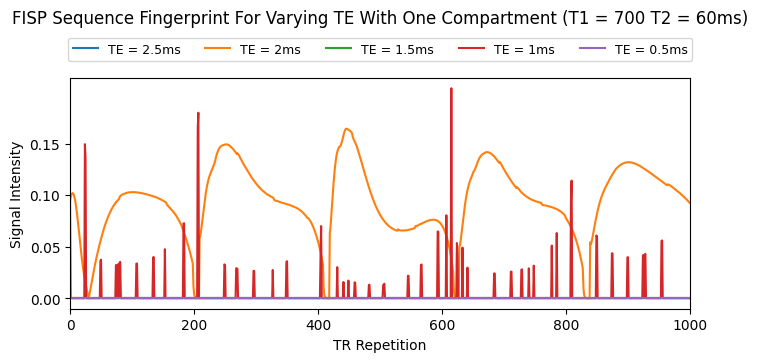

In [8]:
# Read in sequence data
sequence_TE_2 = np.load('DictionaryTE1/echo_700_700_60_60_200_11.0_1.0_1.npy')
sequence_TE_1_5 = np.load('DictionaryTE2/echo_700_700_60_60_200_11.0_1.0_1.npy')
sequence_TE_1 = np.load('DictionaryTE3/echo_700_700_60_60_200_11.0_1.0_1.npy')
sequence_TE_0_5 = np.load('DictionaryTE4/echo_700_700_60_60_200_11.0_1.0_1.npy')
sequence_TE_2_5 = np.load('DictionaryTE5/echo_700_700_60_60_200_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(sequence_TE_2_5/10000, label='TE = 2.5ms') 
plt.plot(sequence_TE_2/10000, label='TE = 2ms') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_TE_1_5/10000, label='TE = 1.5ms') 
plt.plot(sequence_TE_1/10000, label='TE = 1ms') 
plt.plot(sequence_TE_0_5/10000, label='TE = 0.5ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying TE With One Compartment (T1 = 700 T2 = 60ms)', y=1.2)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.ylim = ([0,0.15])
plt.yticks([0,0.05, 0.1, 0.15])
plt.xlim([0,1000])


(0.0, 1000.0)

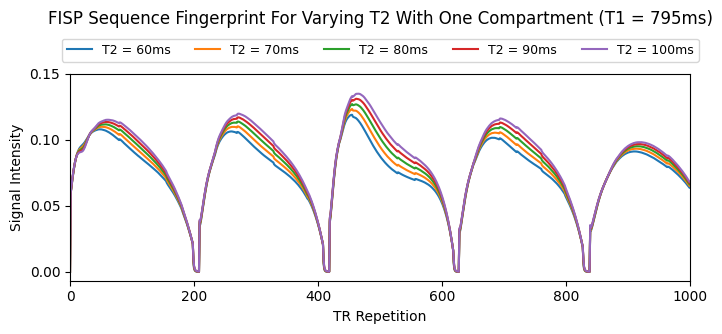

In [56]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISP/echo_795_795_60_60_200_1.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISP/echo_795_795_70_70_200_1.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP/echo_795_795_80_80_200_1.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISP/echo_795_795_90_90_200_1.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP/echo_795_795_100_100_200_1.0_1.0_1.npy')



plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_T2_60/10000, label='T2 = 60ms') 
plt.plot(sequence_T2_70/10000, label='T2 = 70ms') 
plt.plot(sequence_T2_80/10000, label='T2 = 80ms') 
plt.plot(sequence_T2_90/10000, label='T2 = 90ms') 
plt.plot(sequence_T2_100/10000, label='T2 = 100ms') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms)',  y=1.2)
plt.yticks([0,0.05, 0.1, 0.15])
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.subplots_adjust(top=0.8)
plt.xlim([0,1000])


### Assessing how longer TR affects T1 and T2 sensitivity by scaling Perlin into Emma's Range

1.8690744084912823e-16


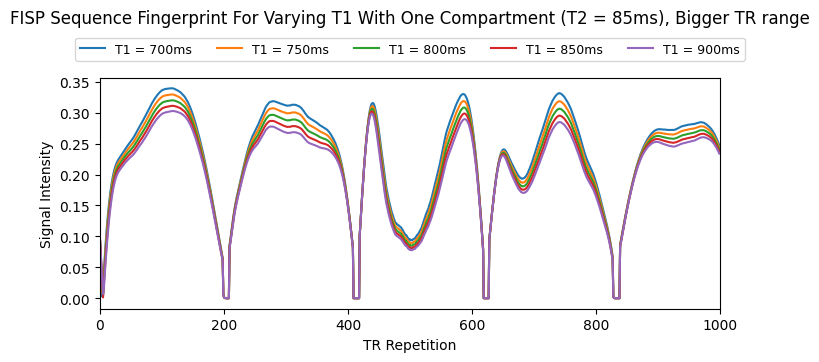

In [12]:
# Read in sequence data
sequence_T1_700 = np.load('DictionaryFISP_OriginalHighTR/echo_700_700_85_85_200_11.0_1.0_1.npy')
sequence_T1_750 = np.load('DictionaryFISP_OriginalHighTR/echo_750_750_85_85_200_11.0_1.0_1.npy')
sequence_T1_800 = np.load('DictionaryFISP_OriginalHighTR/echo_800_800_85_85_200_11.0_1.0_1.npy')
sequence_T1_850 = np.load('DictionaryFISP_OriginalHighTR/echo_850_850_85_85_200_11.0_1.0_1.npy')
sequence_T1_900 = np.load('DictionaryFISP_OriginalHighTR/echo_900_900_85_85_200_11.0_1.0_1.npy')


plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700/10000, label='T1 = 700ms') # divide by 10000 to obtain same scale as Jiang paper (normalised)

plt.plot(sequence_T1_750/10000, label='T1 = 750ms') 
plt.plot(sequence_T1_800/10000, label='T1 = 800ms') 
plt.plot(sequence_T1_850/10000, label='T1 = 850ms') 
plt.plot(sequence_T1_900/10000, label='T1 = 900ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms), Bigger TR range', y=1.2)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.ylim = ([0,0.15])
plt.xlim([0,1000])

print(np.min(sequence_T1_1000/10000))

(0.0, 1000.0)

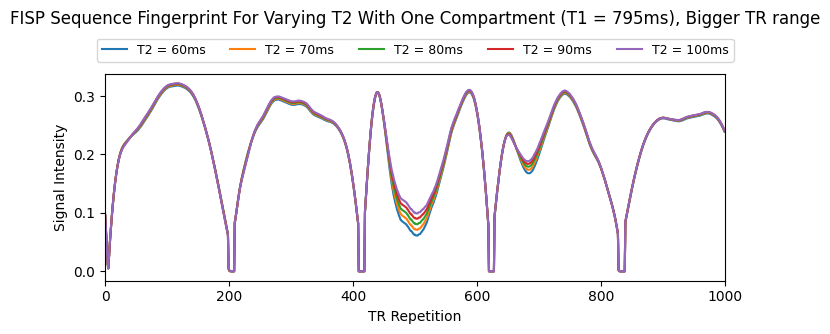

In [14]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISP_OriginalHighTR/echo_795_795_60_60_200_11.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISP_OriginalHighTR/echo_795_795_70_70_200_11.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP_OriginalHighTR/echo_795_795_80_80_200_11.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISP_OriginalHighTR/echo_795_795_90_90_200_11.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP_OriginalHighTR/echo_795_795_100_100_200_11.0_1.0_1.npy')



plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_T2_60/10000, label='T2 = 60ms') 
plt.plot(sequence_T2_70/10000, label='T2 = 70ms') 
plt.plot(sequence_T2_80/10000, label='T2 = 80ms') 
plt.plot(sequence_T2_90/10000, label='T2 = 90ms') 
plt.plot(sequence_T2_100/10000, label='T2 = 100ms') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms), Bigger TR range',  y=1.2)
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.subplots_adjust(top=0.8)
plt.xlim([0,1000])

## FISP variation using CSF-nulling and slice profile correction with Emma's optimal TR and FA

1.8690744084912823e-16


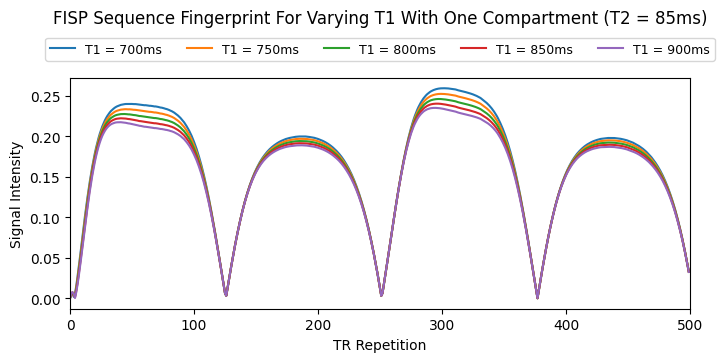

In [22]:
# Read in sequence data
sequence_T1_700 = np.load('DictionaryFISP_Emma_Variation/echo_700_700_85_85_200_11.0_1.0_1.npy')
sequence_T1_750 = np.load('DictionaryFISP_Emma_Variation/echo_750_750_85_85_200_11.0_1.0_1.npy')
sequence_T1_800 = np.load('DictionaryFISP_Emma_Variation/echo_800_800_85_85_200_11.0_1.0_1.npy')
sequence_T1_850 = np.load('DictionaryFISP_Emma_Variation/echo_850_850_85_85_200_11.0_1.0_1.npy')
sequence_T1_900 = np.load('DictionaryFISP_Emma_Variation/echo_900_900_85_85_200_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700/10000, label='T1 = 700ms') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T1_750/10000, label='T1 = 750ms') 
plt.plot(sequence_T1_800/10000, label='T1 = 800ms') 
plt.plot(sequence_T1_850/10000, label='T1 = 850ms') 
plt.plot(sequence_T1_900/10000, label='T1 = 900ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms)', y=1.2)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.ylim = ([0,0.15])
plt.xlim([0,500])

print(np.min(sequence_T1_1000/10000))

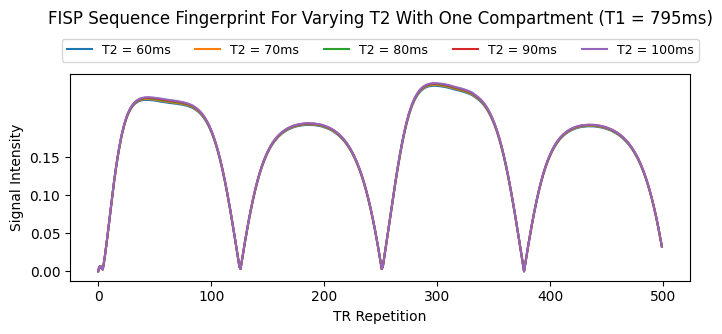

In [25]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISP_Emma_Variation/echo_795_795_60_60_200_11.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISP_Emma_Variation/echo_795_795_70_70_200_11.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP_Emma_Variation/echo_795_795_80_80_200_11.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISP_Emma_Variation/echo_795_795_90_90_200_11.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP_Emma_Variation/echo_795_795_100_100_200_11.0_1.0_1.npy')


plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_T2_60/10000, label='T2 = 60ms') 
plt.plot(sequence_T2_70/10000, label='T2 = 70ms') 
plt.plot(sequence_T2_80/10000, label='T2 = 80ms') 
plt.plot(sequence_T2_90/10000, label='T2 = 90ms') 
plt.plot(sequence_T2_100/10000, label='T2 = 100ms') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms)',  y=1.2)
plt.yticks([0,0.05, 0.1, 0.15])
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.subplots_adjust(top=0.8)


## WEX--Extremes of Blood Volume With Emma's Variation

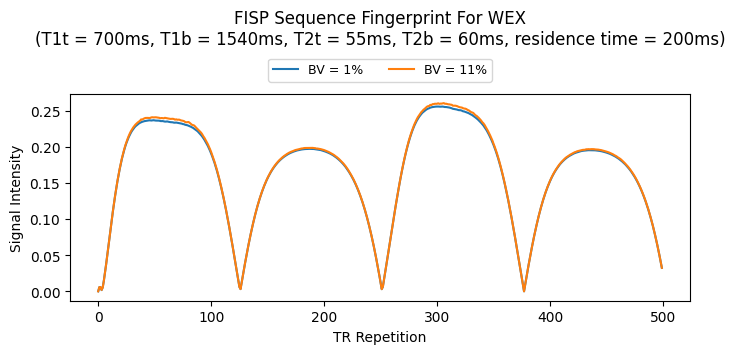

In [38]:
# Read in sequence data
sequence_1pc= np.load('DictionaryFISP_Emma_Variation_WEX/echo_700_1540_55_60_200_1.0_1.0_1.npy')
sequence_11pc = np.load('DictionaryFISP_Emma_Variation_WEX/echo_700_1540_55_60_200_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_1pc/10000, label='BV = 1%') 
plt.plot(sequence_11pc/10000, label='BV = 11%') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For WEX' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, residence time = 200ms)',  y=1.2)
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.subplots_adjust(top=0.8)

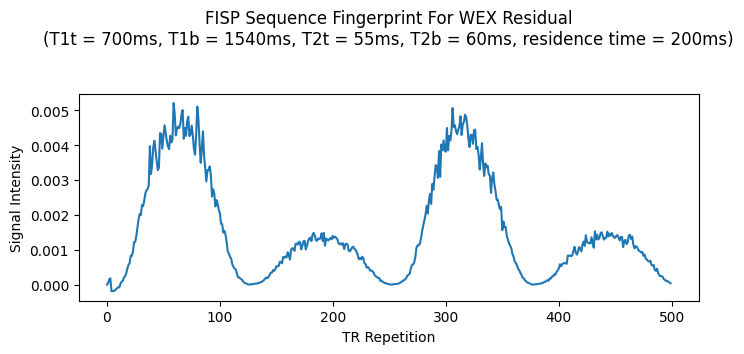

In [39]:
# Plot the sequence on line graph
plt.plot(sequence_11pc/10000 - sequence_1pc/10000) 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For WEX Residual' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, residence time = 200ms)',  y=1.2)
plt.subplots_adjust(top=0.8)

In [ ]:
# Read in sequence data
sequence_1pc= np.load('DictionaryFISP_Emma_Variation_WEX/echo_700_1540_55_60_200_1.0_1.0_1.npy')
sequence_11pc = np.load('DictionaryFISP_Emma_Variation_WEX/echo_700_1540_55_60_200_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_1pc/10000, label='BV = 1%') 
plt.plot(sequence_11pc/10000, label='BV = 11%') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For WEX' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, residence time = 200ms)',  y=1.2)
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.subplots_adjust(top=0.8)

### Now look at SPGRE for the same thing

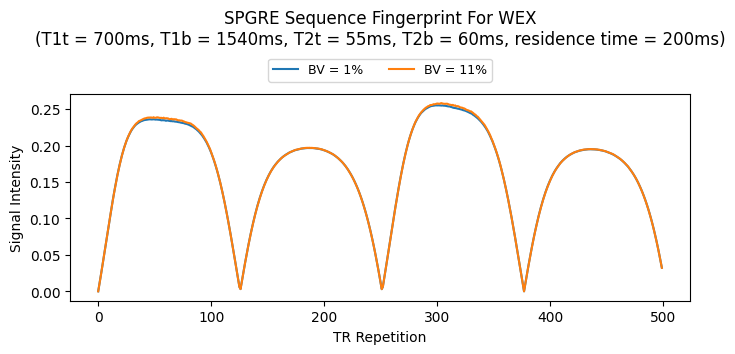

In [34]:
# Read in sequence data
sequence_1pc= np.load('DictionarySPGRE_Emma_Variation_WEX/echo_700_1540_200_1.0_1.0_1.npy')
sequence_11pc = np.load('DictionarySPGRE_Emma_Variation_WEX/echo_700_1540_200_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_1pc/10000, label='BV = 1%') 
plt.plot(sequence_11pc/10000, label='BV = 11%') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('SPGRE Sequence Fingerprint For WEX' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, residence time = 200ms)',  y=1.2)
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.subplots_adjust(top=0.8)

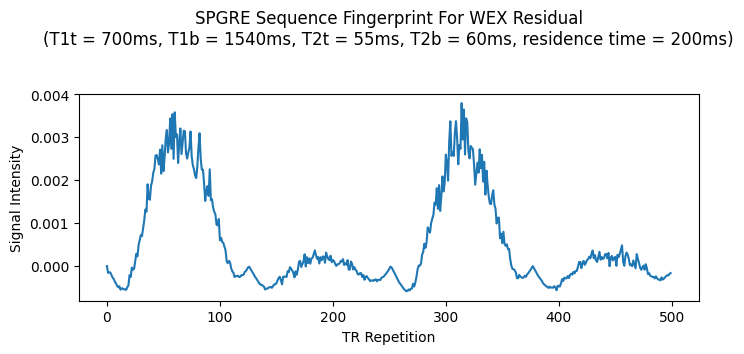

In [37]:
# Plot the sequence on line graph
plt.plot(sequence_11pc/10000 - sequence_1pc/10000) 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('SPGRE Sequence Fingerprint For WEX Residual' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, residence time = 200ms)',  y=1.2)
# Add legend above the plot
plt.subplots_adjust(top=0.8)

## WEX--Extremes of Residence Time With Emma's Variation

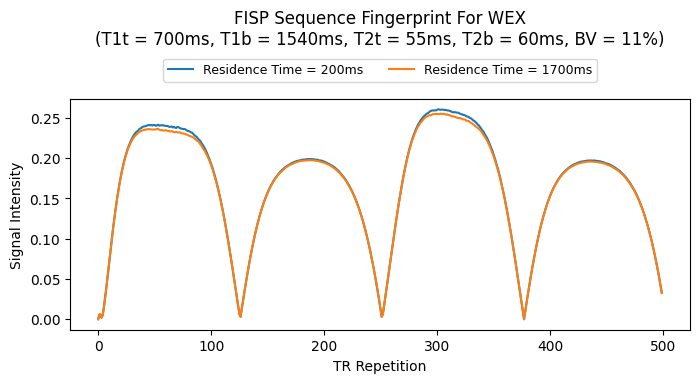

In [42]:
# Read in sequence data
sequence_200rt = np.load('DictionaryFISP_Emma_Variation_WEX/echo_700_1540_55_60_200_11.0_1.0_1.npy')
sequence_1700rt= np.load('DictionaryFISP_Emma_Variation_WEX/echo_700_1540_55_60_1700_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_200rt/10000, label='Residence Time = 200ms') 
plt.plot(sequence_1700rt/10000, label='Residence Time = 1700ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For WEX' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, BV = 11%)',  y=1.2)
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })

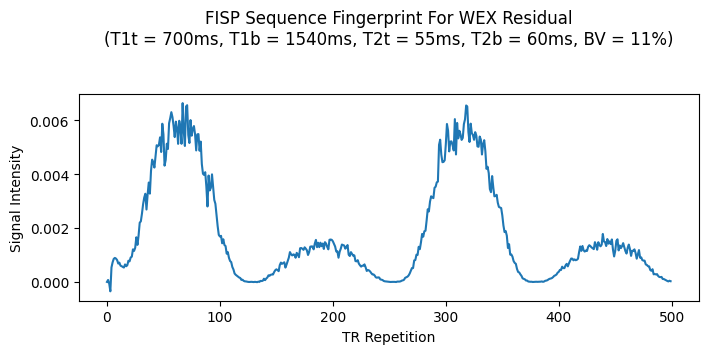

In [43]:
# Plot the sequence on line graph
plt.plot(sequence_200rt/10000 - sequence_1700rt/10000) 

plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For WEX Residual' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, BV = 11%)',  y=1.2)
# Add legend above the plot
plt.subplots_adjust(top=0.8)

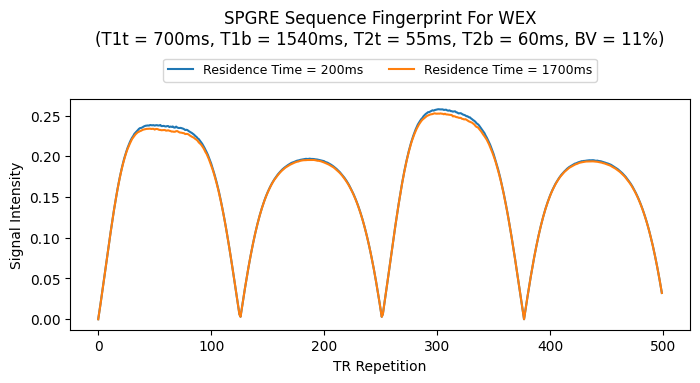

In [44]:
# Read in sequence data
sequence_200rt = np.load('DictionarySPGRE_Emma_Variation_WEX/echo_700_1540_200_11.0_1.0_1.npy')
sequence_1700rt= np.load('DictionarySPGRE_Emma_Variation_WEX/echo_700_1540_1700_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_200rt/10000, label='Residence Time = 200ms') 
plt.plot(sequence_1700rt/10000, label='Residence Time = 1700ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('SPGRE Sequence Fingerprint For WEX' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, BV = 11%)',  y=1.2)
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })

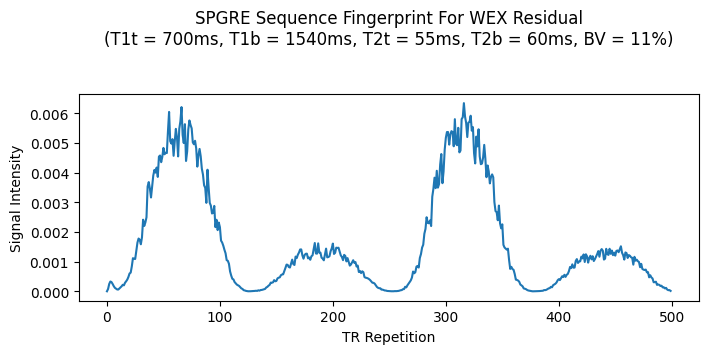

In [45]:
# Plot the sequence on line graph
plt.plot(sequence_200rt/10000 - sequence_1700rt/10000) 

plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('SPGRE Sequence Fingerprint For WEX Residual' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, BV = 11%)',  y=1.2)
# Add legend above the plot
plt.subplots_adjust(top=0.8)

(0.0, 500.0)

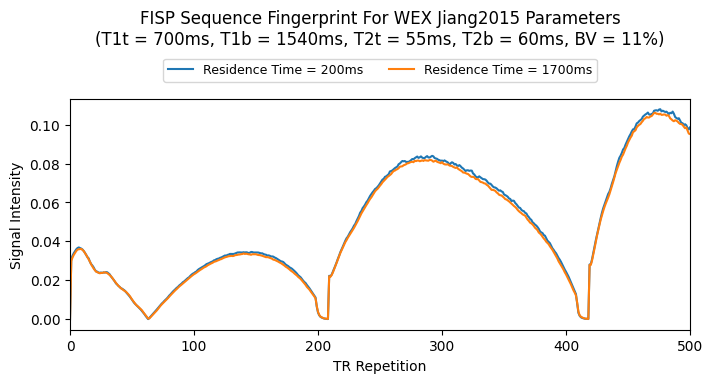

In [7]:
# Read in sequence data
sequence_200rt = np.load('DictionaryFISP_WEX/echo_700_1540_55_60_200_11.0_1.0_1.npy')
sequence_1700rt= np.load('DictionaryFISP_WEX/echo_700_1540_55_60_1700_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [8, 3]
# Plot the sequence on line graph

plt.plot(sequence_200rt/10000, label='Residence Time = 200ms') 
plt.plot(sequence_1700rt/10000, label='Residence Time = 1700ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For WEX Jiang2015 Parameters' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, BV = 11%)',  y=1.2)
# Add legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 9 })
plt.xlim([0,500])

(0.0, 500.0)

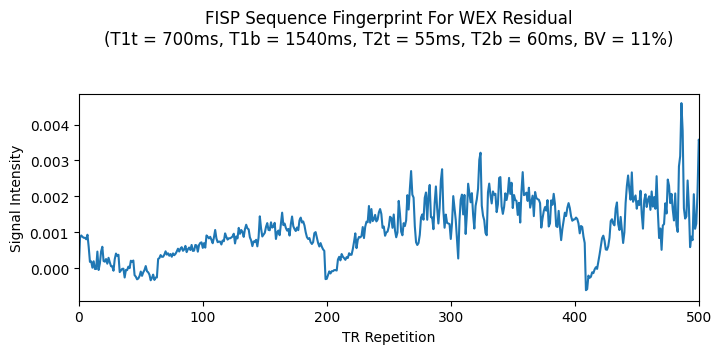

In [8]:
# Plot the sequence on line graph
plt.plot(sequence_200rt/10000 - sequence_1700rt/10000) 

plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For WEX Residual' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 55ms, T2b = 60ms, BV = 11%)',  y=1.2)
# Add legend above the plot
plt.subplots_adjust(top=0.8)
plt.xlim([0,500])

(30.0, 200.0)

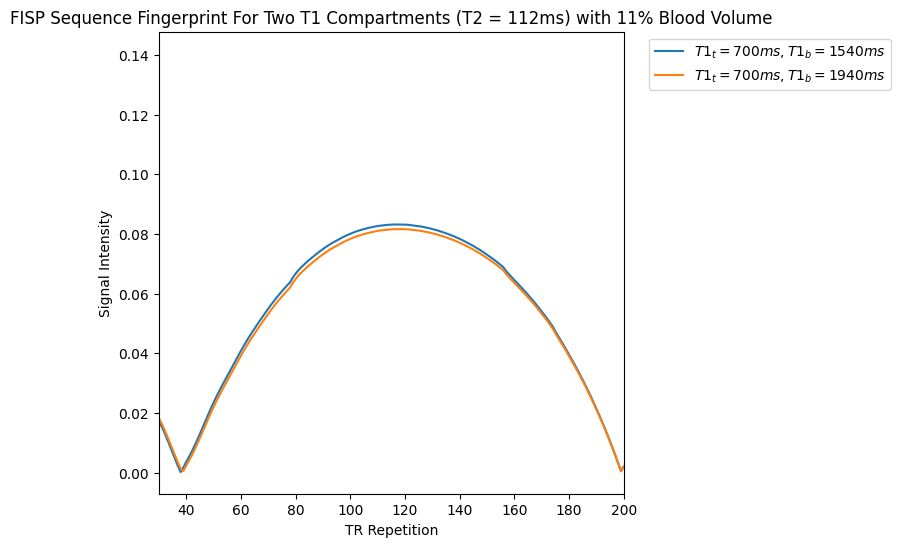

In [57]:
# Read in sequence data
sequence_T1_700t_1540b = np.load('DictionaryFISP/echo_700_1540_112_112_200_11.0_1.0_1.npy')
sequence_T1_700t_1940b = np.load('DictionaryFISP/echo_700_1940_112_112_200_11.0_1.0_1.npy')
sequence_T1_1700t_1540b = np.load('DictionaryFISP/echo_1700_1540_112_112_200_11.0_1.0_1.npy')
sequence_T1_1700t_1940b = np.load('DictionaryFISP/echo_1700_1940_112_112_200_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [6, 6]
# Plot the sequence on line graph
plt.plot(sequence_T1_700t_1540b/10000, label=r'$T1_t = 700ms, T1_b = 1540ms$') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T1_700t_1940b/10000, label=r'$T1_t = 700ms, T1_b = 1940ms$') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Two T1 Compartments (T2 = 112ms) with 11% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([30,200])

(0.0, 1000.0)

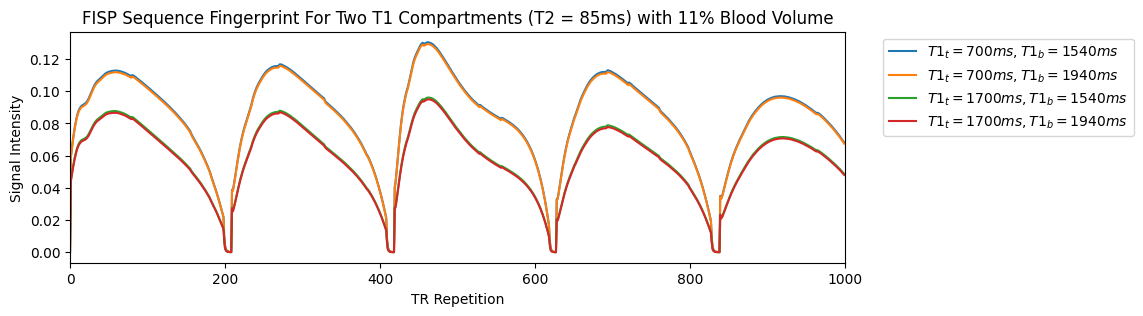

In [58]:
# Read in sequence data
sequence_T1_700t_1540b = np.load('DictionaryFISP/echo_700_1540_85_85_200_11.0_1.0_1.npy')
sequence_T1_700t_1940b = np.load('DictionaryFISP/echo_700_1940_85_85_200_11.0_1.0_1.npy')
sequence_T1_1700t_1540b = np.load('DictionaryFISP/echo_1700_1540_85_85_200_11.0_1.0_1.npy')
sequence_T1_1700t_1940b = np.load('DictionaryFISP/echo_1700_1940_85_85_200_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700t_1540b/10000, label=r'$T1_t = 700ms, T1_b = 1540ms$') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T1_700t_1940b/10000, label=r'$T1_t = 700ms, T1_b = 1940ms$') 
plt.plot(sequence_T1_1700t_1540b/10000, label=r'$T1_t = 1700ms, T1_b = 1540ms$') 
plt.plot(sequence_T1_1700t_1940b/10000, label=r'$T1_t = 1700ms, T1_b = 1940ms$') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Two T1 Compartments (T2 = 85ms) with 11% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


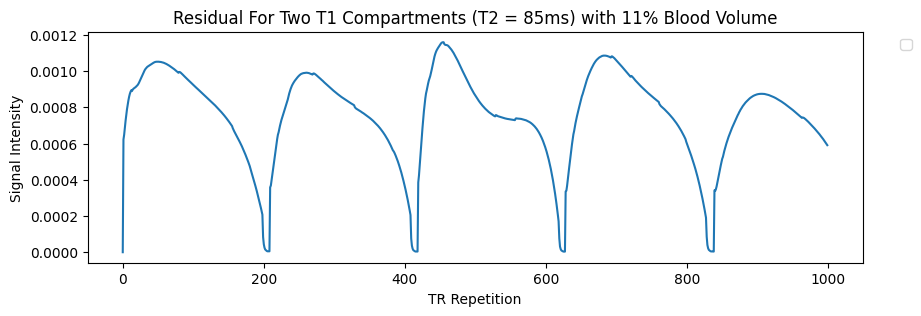

In [60]:
plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_1700t_1540b/10000 - sequence_T1_1700t_1940b/10000) # divide by 10000 to obtain same scale as Jiang paper (normalised)



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('Residual For Two T1 Compartments (T2 = 85ms) with 11% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


(0.0, 1000.0)

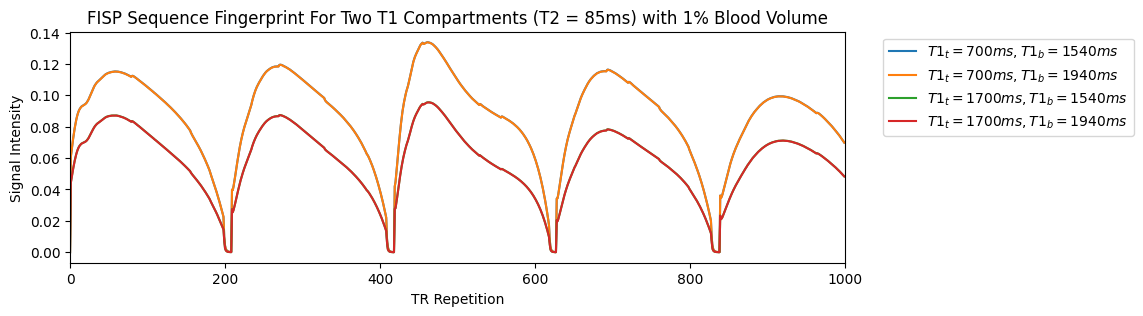

In [64]:
# Read in sequence data
sequence_T1_700t_1540b = np.load('DictionaryFISP/echo_700_1540_85_85_200_1.0_1.0_1.npy')
sequence_T1_700t_1940b = np.load('DictionaryFISP/echo_700_1940_85_85_200_1.0_1.0_1.npy')
sequence_T1_1700t_1540b = np.load('DictionaryFISP/echo_1700_1540_85_85_200_1.0_1.0_1.npy')
sequence_T1_1700t_1940b = np.load('DictionaryFISP/echo_1700_1940_85_85_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700t_1540b/10000, label=r'$T1_t = 700ms, T1_b = 1540ms$') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T1_700t_1940b/10000, label=r'$T1_t = 700ms, T1_b = 1940ms$') 
plt.plot(sequence_T1_1700t_1540b/10000, label=r'$T1_t = 1700ms, T1_b = 1540ms$') 
plt.plot(sequence_T1_1700t_1940b/10000, label=r'$T1_t = 1700ms, T1_b = 1940ms$') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Two T1 Compartments (T2 = 85ms) with 1% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

(30.0, 200.0)

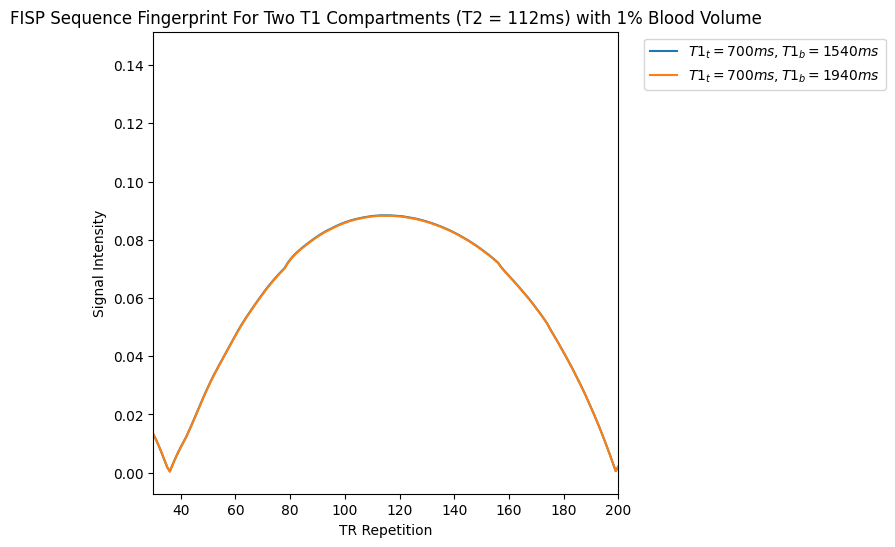

In [48]:
# Read in sequence data
sequence_T1_700t_1540b = np.load('DictionaryFISP/echo_700_1540_112_112_200_1.0_1.0_1.npy')
sequence_T1_700t_1940b = np.load('DictionaryFISP/echo_700_1940_112_112_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [6, 6]
# Plot the sequence on line graph
plt.plot(sequence_T1_700t_1540b/10000, label=r'$T1_t = 700ms, T1_b = 1540ms$') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T1_700t_1940b/10000, label=r'$T1_t = 700ms, T1_b = 1940ms$') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Two T1 Compartments (T2 = 112ms) with 1% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([30,200])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


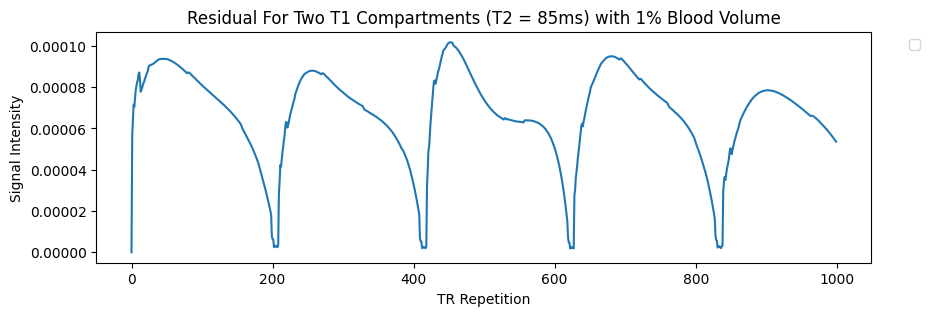

In [65]:
plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700t_1540b/10000 - sequence_T1_700t_1940b/10000) # divide by 10000 to obtain same scale as Jiang paper (normalised)


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('Residual For Two T1 Compartments (T2 = 85ms) with 1% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


(0.0, 1000.0)

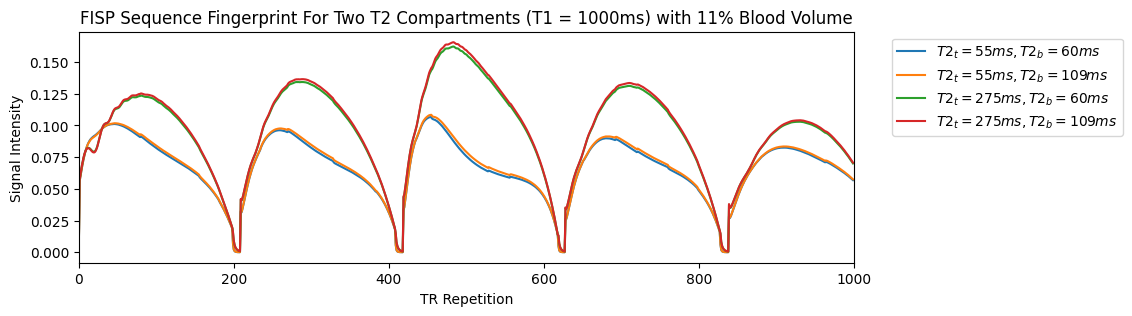

In [73]:
# Read in sequence data
sequence_T2_55t_60b = np.load('DictionaryFISP/echo_1000_1000_55_60_200_11.0_1.0_1.npy')
sequence_T2_55t_109b = np.load('DictionaryFISP/echo_1000_1000_55_109_200_11.0_1.0_1.npy')
sequence_T2_275t_60b = np.load('DictionaryFISP/echo_1000_1000_275_60_200_11.0_1.0_1.npy')
sequence_T2_275t_109b = np.load('DictionaryFISP/echo_1000_1000_275_109_200_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T2_55t_60b/10000, label=r'$T2_t = 55ms, T2_b = 60ms$') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T2_55t_109b/10000, label=r'$T2_t = 55ms, T2_b = 109ms$') 
plt.plot(sequence_T2_275t_60b/10000, label=r'$T2_t = 275ms, T2_b = 60ms$') 
plt.plot(sequence_T2_275t_109b/10000, label=r'$T2_t = 275ms, T2_b = 109ms$') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Two T2 Compartments (T1 = 1000ms) with 11% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


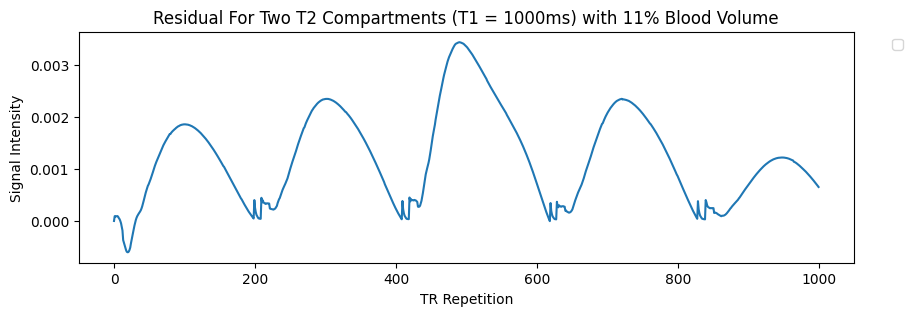

In [71]:
plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T2_275t_109b/10000 - sequence_T2_275t_60b/10000) # divide by 10000 to obtain same scale as Jiang paper (normalised)


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('Residual For Two T2 Compartments (T1 = 1000ms) with 11% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


(0.0, 1000.0)

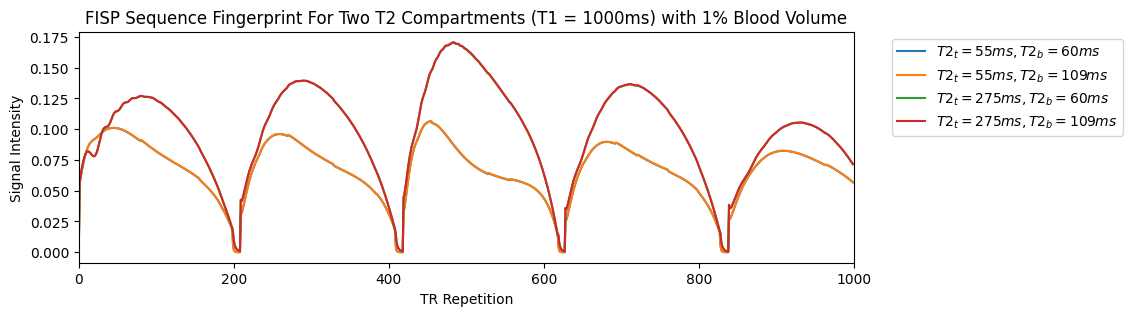

In [74]:
# Read in sequence data
sequence_T2_55t_60b = np.load('DictionaryFISP/echo_1000_1000_55_60_200_1.0_1.0_1.npy')
sequence_T2_55t_109b = np.load('DictionaryFISP/echo_1000_1000_55_109_200_1.0_1.0_1.npy')
sequence_T2_275t_60b = np.load('DictionaryFISP/echo_1000_1000_275_60_200_1.0_1.0_1.npy')
sequence_T2_275t_109b = np.load('DictionaryFISP/echo_1000_1000_275_109_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T2_55t_60b/10000, label=r'$T2_t = 55ms, T2_b = 60ms$') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T2_55t_109b/10000, label=r'$T2_t = 55ms, T2_b = 109ms$') 
plt.plot(sequence_T2_275t_60b/10000, label=r'$T2_t = 275ms, T2_b = 60ms$') 
plt.plot(sequence_T2_275t_109b/10000, label=r'$T2_t = 275ms, T2_b = 109ms$') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Two T2 Compartments (T1 = 1000ms) with 1% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


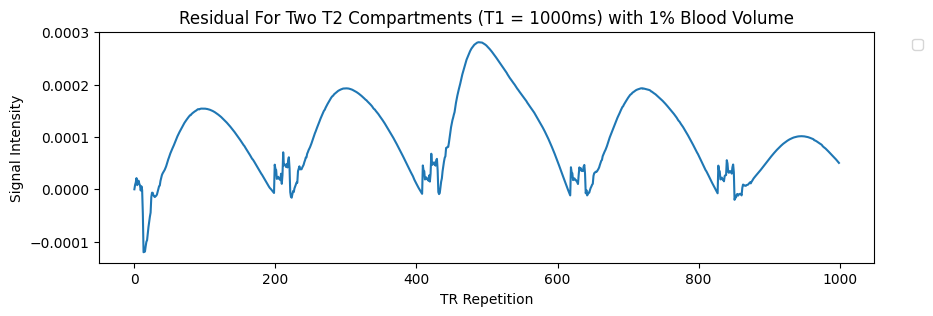

In [75]:
plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T2_55t_109b/10000 - sequence_T2_55t_60b/10000) # divide by 10000 to obtain same scale as Jiang paper (normalised)


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('Residual For Two T2 Compartments (T1 = 1000ms) with 1% Blood Volume')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# Water Exchange Graphs
1) Difference in Blood Volume
2) Difference in Percentage Residence Time

Set a 'seed' here to fix the amount of water exchange per TR for consistency in evaluation

(0.0, 1000.0)

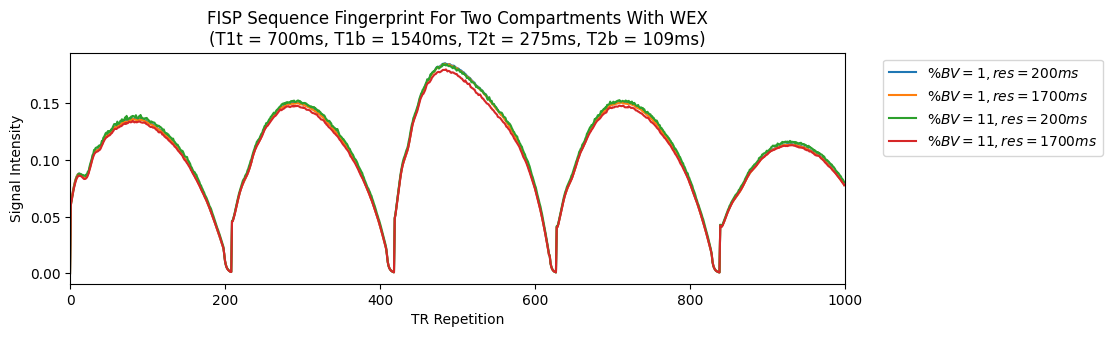

In [88]:
# Read in sequence data
perc_1_res_200= np.load('DictionaryFISP/echo_700_1540_275_109_200_1.0_1.0_1.npy')
perc_1_res_1700 = np.load('DictionaryFISP/echo_700_1540_275_109_1700_1.0_1.0_1.npy')
perc_11_res_200  = np.load('DictionaryFISP/echo_700_1540_275_109_200_11.0_1.0_1.npy')
perc_11_res_1700  = np.load('DictionaryFISP/echo_700_1540_275_109_1700_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(perc_1_res_200/10000, label=r'$\%BV = 1, res = 200ms$') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(perc_1_res_1700/10000, label=r'$\%BV = 1, res = 1700ms$') 
plt.plot(perc_11_res_200/10000, label=r'$\%BV = 11, res = 200ms$') 
plt.plot(perc_11_res_1700/10000, label=r'$\%BV = 11, res = 1700ms$') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title(r'FISP Sequence Fingerprint For Two Compartments With WEX' '\n' '(T1t = 700ms, T1b = 1540ms, T2t = 275ms, T2b = 109ms)' )
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

(0.0, 200.0)

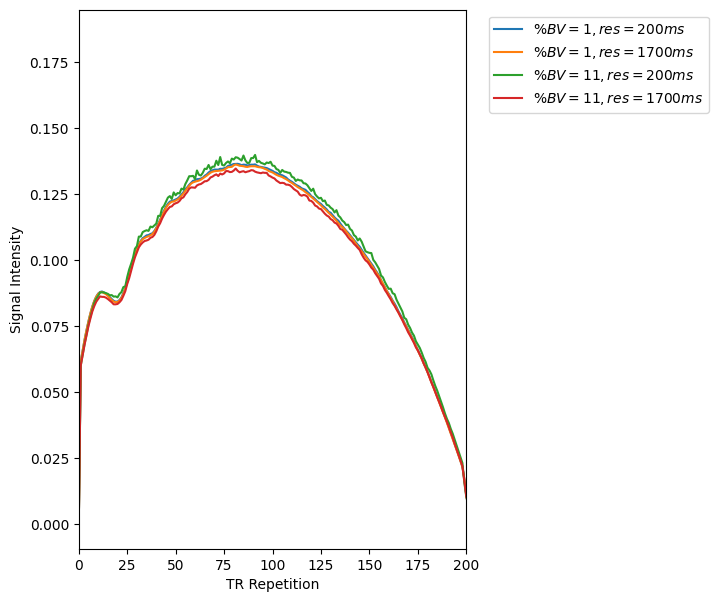

In [87]:
# Read in sequence data
perc_1_res_200= np.load('DictionaryFISP/echo_700_1540_275_109_200_1.0_1.0_1.npy')
perc_1_res_1700 = np.load('DictionaryFISP/echo_700_1540_275_109_1700_1.0_1.0_1.npy')
perc_11_res_200  = np.load('DictionaryFISP/echo_700_1540_275_109_200_11.0_1.0_1.npy')
perc_11_res_1700  = np.load('DictionaryFISP/echo_700_1540_275_109_1700_11.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [5, 7]
# Plot the sequence on line graph
plt.plot(perc_1_res_200/10000, label=r'$\%BV = 1, res = 200ms$') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(perc_1_res_1700/10000, label=r'$\%BV = 1, res = 1700ms$') 
plt.plot(perc_11_res_200/10000, label=r'$\%BV = 11, res = 200ms$') 
plt.plot(perc_11_res_1700/10000, label=r'$\%BV = 11, res = 1700ms$') 



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,200])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


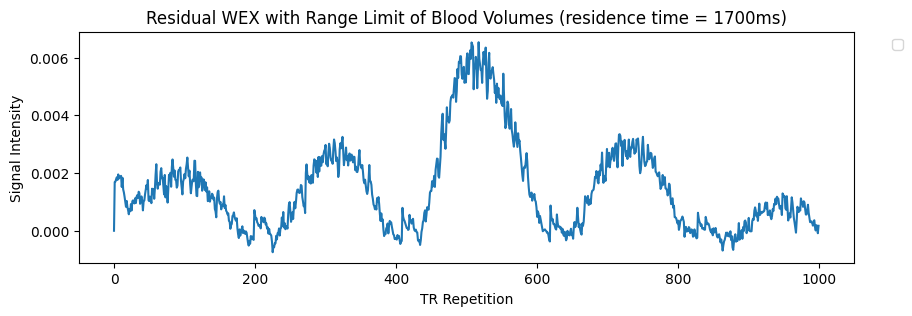

In [95]:
plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(-perc_11_res_1700/10000 + perc_1_res_1700/10000) # divide by 10000 to obtain same scale as Jiang paper (normalised)


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('Residual WEX with Range Limit of Blood Volumes (residence time = 1700ms)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


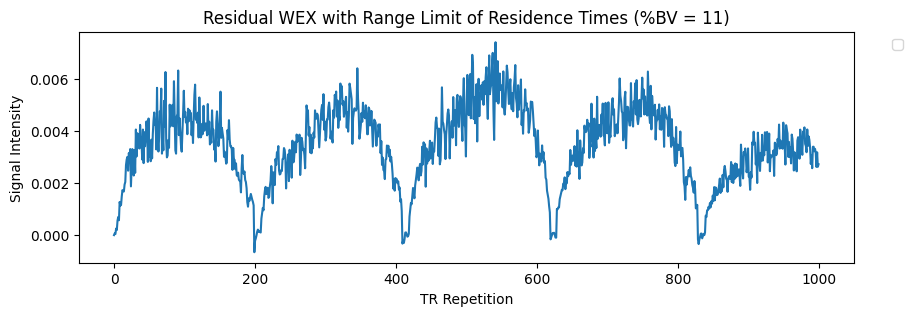

In [93]:
plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(perc_11_res_200/10000 - perc_11_res_1700/10000) # divide by 10000 to obtain same scale as Jiang paper (normalised)


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('Residual WEX with Range Limit of Residence Times (%BV = 11)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

(0.0, 1000.0)

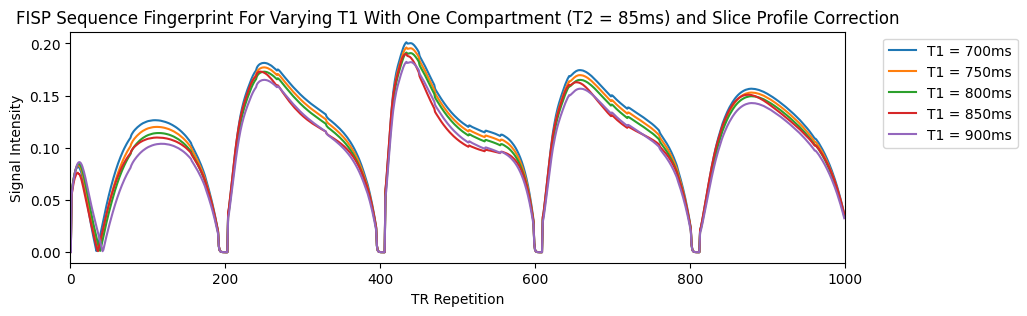

In [24]:
# Read in sequence data
sequence_T1_700 = np.load('DictionaryFISP/echo_700_700_85_85_200_1.0_1.0_1.npy')
sequence_T1_750 = np.load('DictionaryFISP/echo_750_750_85_85_200_1.0_1.0_1.npy')
sequence_T1_800 = np.load('DictionaryFISP/echo_800_800_85_85_200_1.0_1.0_1.npy')
sequence_T1_850 = np.load('DictionaryFISP/echo_850_850_85_85_200_1.0_1.0_1.npy')
sequence_T1_900 = np.load('DictionaryFISP/echo_900_900_85_85_200_1.0_1.0_1.npy')
sequence_T1_400 = np.load('DictionaryFISP/echo_400_400_85_85_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700, label='T1 = 700ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T1_750, label='T1 = 750ms') 
plt.plot(sequence_T1_800, label='T1 = 800ms') 
plt.plot(sequence_T1_850, label='T1 = 850ms') 
plt.plot(sequence_T1_900, label='T1 = 900ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms) and Slice Profile Correction')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])


(0.0, 1000.0)

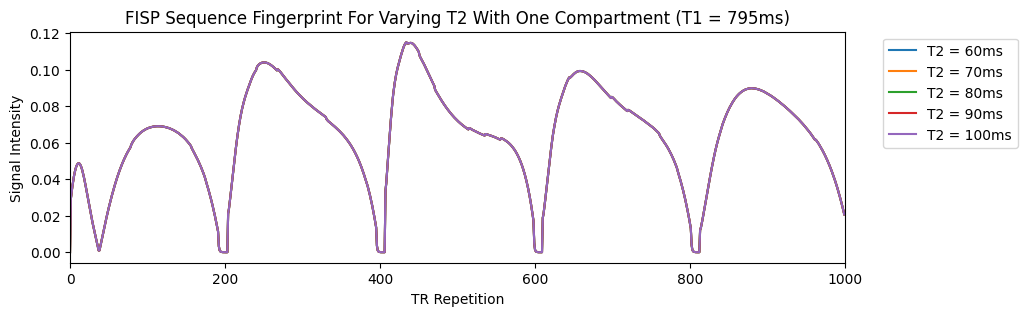

In [17]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISP/echo_795_795_60_60_200_1.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISP/echo_795_795_70_70_200_1.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP/echo_795_795_80_80_200_1.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISP/echo_795_795_90_90_200_1.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP/echo_795_795_100_100_200_1.0_1.0_1.npy')



plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph

# max magnetization needs to be scaled to 1. the magnetisation in our work is [0,0,1]*noXIso*noYIso*noZIso. Therefore divide by our max magnetisation = 10,000

plt.plot(sequence_T2_60, label='T2 = 60ms') 
plt.plot(sequence_T2_70, label='T2 = 70ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_80, label='T2 = 80ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_90, label='T2 = 90ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_100, label='T2 = 100ms') # divide by 6000 to obtain same scale as Jiang paper




plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

(0.0, 1000.0)

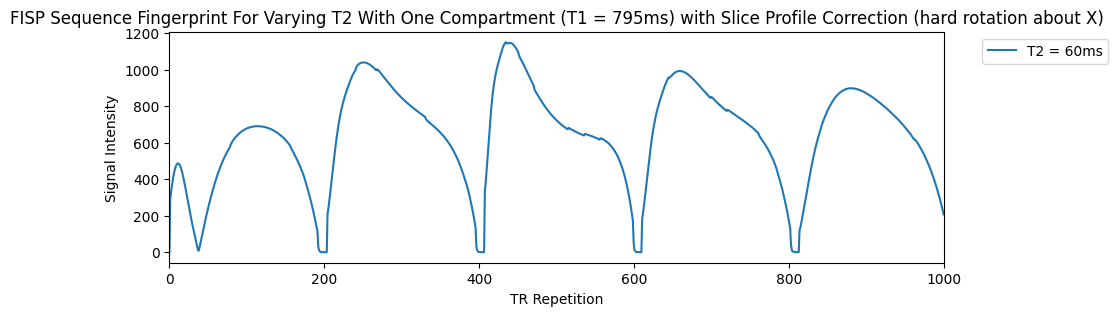

In [2]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISP/echo_795_795_60_60_200_1.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISP/echo_795_795_70_70_200_1.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP/echo_795_795_80_80_200_1.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISP/echo_795_795_90_90_200_1.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP/echo_795_795_200_1.0_1.0_1.npy')



plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph

# max magnetization needs to be scaled to 1. the magnetisation in our work is [0,0,1]*noXIso*noYIso*noZIso. Therefore divide by our max magnetisation = 10,000

plt.plot(sequence_T2_60, label='T2 = 60ms') 
"""
plt.plot(sequence_T2_70/10000, label='T2 = 70ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_80/10000, label='T2 = 80ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_90/10000, label='T2 = 90ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_100/10000, label='T2 = 100ms') # divide by 6000 to obtain same scale as Jiang paper
"""



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms) with Slice Profile Correction (hard rotation about X)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

In [20]:
rotX = np.array([500,3,3], dtype = "complex_")

In [21]:
thetaX = 5
rotX = np.array([[1, 0, 0], [0, np.cos(thetaX), np.sin(thetaX)], \
                    [0, -np.sin(thetaX), np.cos(thetaX)]])
rotY = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
vecMRotation = np.matmul(rotY,rotX) 

In [27]:
vecMRotation


array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.28366219, -0.95892427],
       [ 0.        ,  0.95892427,  0.28366219]])

In [28]:
rotX

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.28366219, -0.95892427],
       [ 0.        ,  0.95892427,  0.28366219]])

In [1]:
# Read in sequence data
import numpy as np
import matplotlib.pyplot as plt
sequence_T1_700 = np.load('DictionaryFISP_WEX_ISMRM/echo_1000_1500_38_55_200_1.0_0.8_1.npy')

25.84925392321308

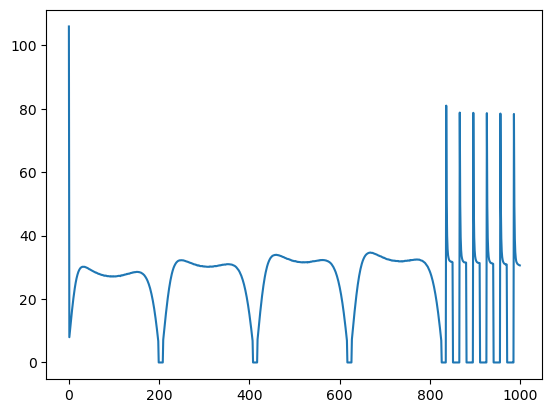

In [9]:
plt.plot(sequence_T1_700[:,1]/100)
np.mean(sequence_T1_700[:,1]/100)

(0.0, 1000.0)

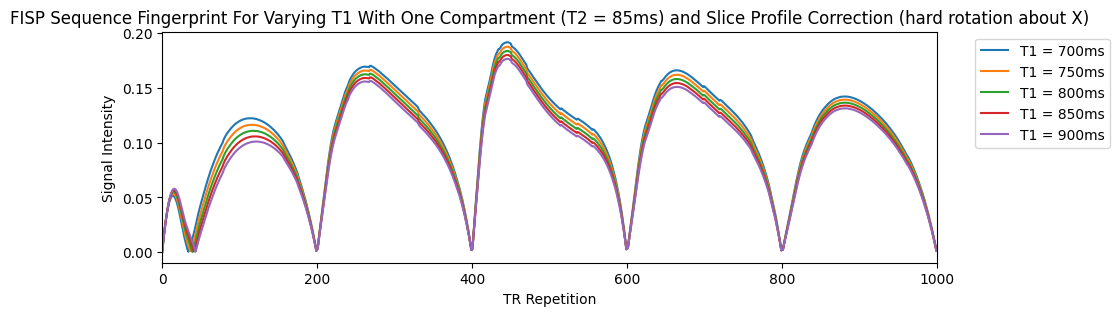

In [26]:
# Read in sequence data
sequence_T1_700 = np.load('DictionaryFISP/echo_700_700_85_85_200_1.0_1.0_1.npy')
sequence_T1_750 = np.load('DictionaryFISP/echo_750_750_85_85_200_1.0_1.0_1.npy')
sequence_T1_800 = np.load('DictionaryFISP/echo_800_800_85_85_200_1.0_1.0_1.npy')
sequence_T1_850 = np.load('DictionaryFISP/echo_850_850_85_85_200_1.0_1.0_1.npy')
sequence_T1_900 = np.load('DictionaryFISP/echo_900_900_85_85_200_1.0_1.0_1.npy')
sequence_T1_400 = np.load('DictionaryFISP/echo_400_400_85_85_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700/10000, label='T1 = 700ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T1_750/10000, label='T1 = 750ms') 
plt.plot(sequence_T1_800/10000, label='T1 = 800ms') 
plt.plot(sequence_T1_850/10000, label='T1 = 850ms') 
plt.plot(sequence_T1_900/10000, label='T1 = 900ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms) and Slice Profile Correction (hard rotation about X)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

(0.0, 1000.0)

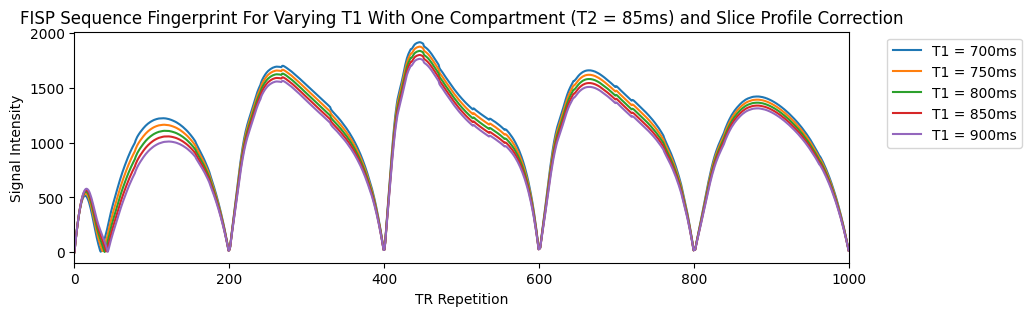

In [17]:
# Read in sequence data
sequence_T1_700 = np.load('DictionaryFISP/echo_700_700_85_85_200_1.0_1.0_1.npy')
sequence_T1_750 = np.load('DictionaryFISP/echo_750_750_85_85_200_1.0_1.0_1.npy')
sequence_T1_800 = np.load('DictionaryFISP/echo_800_800_85_85_200_1.0_1.0_1.npy')
sequence_T1_850 = np.load('DictionaryFISP/echo_850_850_85_85_200_1.0_1.0_1.npy')
sequence_T1_900 = np.load('DictionaryFISP/echo_900_900_85_85_200_1.0_1.0_1.npy')
sequence_T1_400 = np.load('DictionaryFISP/echo_400_400_85_85_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700, label='T1 = 700ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T1_750, label='T1 = 750ms') 
plt.plot(sequence_T1_800, label='T1 = 800ms') 
plt.plot(sequence_T1_850, label='T1 = 850ms') 
plt.plot(sequence_T1_900, label='T1 = 900ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms) and Slice Profile Correction')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

(0.0, 1000.0)

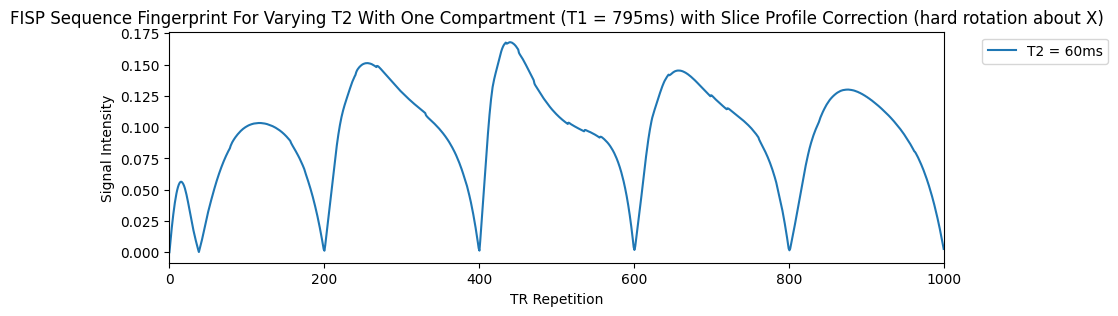

In [12]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISP/echo_795_795_60_60_200_1.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISP/echo_795_795_70_70_200_1.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP/echo_795_795_80_80_200_1.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISP/echo_795_795_90_90_200_1.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP/echo_795_795_100_100_200_1.0_1.0_1.npy')



plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph

# max magnetization needs to be scaled to 1. the magnetisation in our work is [0,0,1]*noXIso*noYIso*noZIso. Therefore divide by our max magnetisation = 10,000

plt.plot(sequence_T2_60, label='T2 = 60ms') 
"""
plt.plot(sequence_T2_70/10000, label='T2 = 70ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_80/10000, label='T2 = 80ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_90/10000, label='T2 = 90ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_100/10000, label='T2 = 100ms') # divide by 6000 to obtain same scale as Jiang paper
"""



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms) with Slice Profile Correction (hard rotation about X)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])

(0.0, 1000.0)

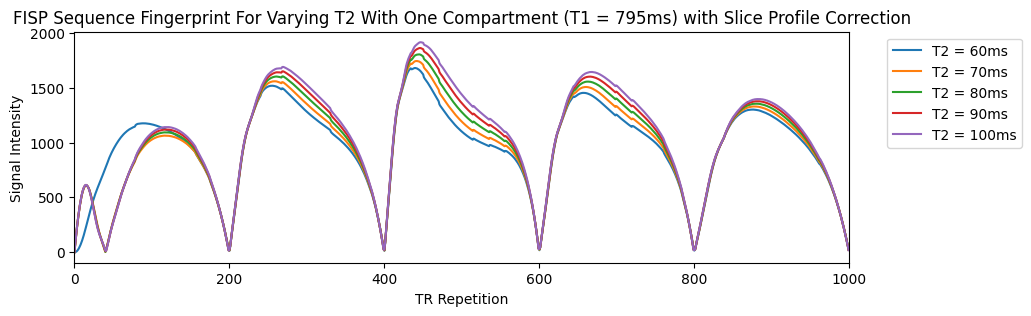

In [5]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISP/echo_795_795_60_60_200_1.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISP/echo_795_795_70_70_200_1.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP/echo_795_795_80_80_200_1.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISP/echo_795_795_90_90_200_1.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP/echo_795_795_100_100_200_1.0_1.0_1.npy')



plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph

plt.plot(sequence_T2_60, label='T2 = 60ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_70, label='T2 = 70ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_80, label='T2 = 80ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_90, label='T2 = 90ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_100, label='T2 = 100ms') # divide by 6000 to obtain same scale as Jiang paper



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms) with Slice Profile Correction')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])


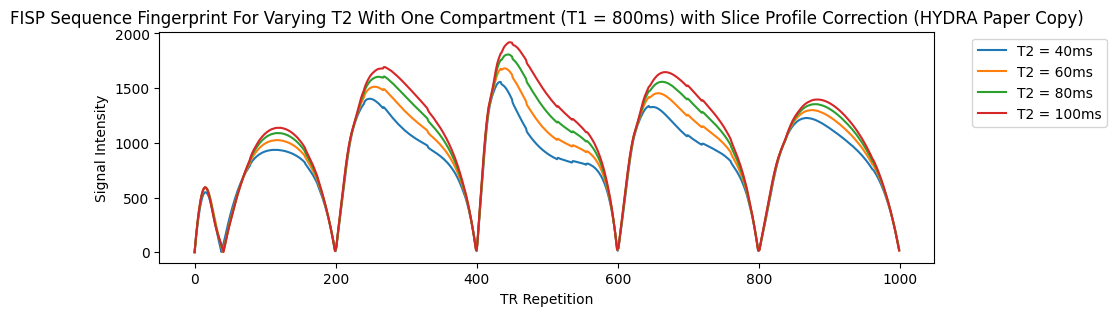

In [49]:
# Read in sequence data
sequence_T2_40 = np.load('DictionaryFISP/echo_800_800_40_40_200_1.0_1.0_1.npy')
sequence_T2_60 = np.load('DictionaryFISP/echo_800_800_60_60_200_1.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP/echo_800_800_80_80_200_1.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP/echo_800_800_100_100_200_1.0_1.0_1.npy')



plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph

plt.plot(sequence_T2_40, label='T2 = 40ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_60, label='T2 = 60ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_80, label='T2 = 80ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_100, label='T2 = 100ms') # divide by 6000 to obtain same scale as Jiang paper



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 800ms) with Slice Profile Correction (HYDRA Paper Copy)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

CORRECTED RF PULSE ROTATION

(0.0, 1000.0)

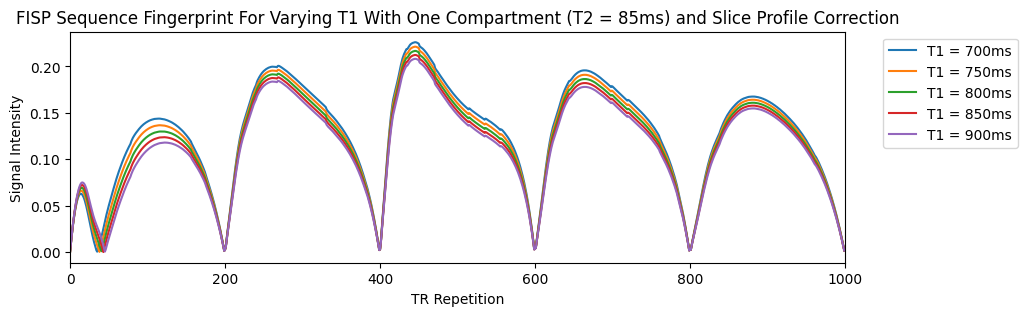

In [28]:
# Read in sequence data
sequence_T1_700 = np.load('DictionaryFISP/echo_700_700_85_85_200_1.0_1.0_1.npy')
sequence_T1_750 = np.load('DictionaryFISP/echo_750_750_85_85_200_1.0_1.0_1.npy')
sequence_T1_800 = np.load('DictionaryFISP/echo_800_800_85_85_200_1.0_1.0_1.npy')
sequence_T1_850 = np.load('DictionaryFISP/echo_850_850_85_85_200_1.0_1.0_1.npy')
sequence_T1_900 = np.load('DictionaryFISP/echo_900_900_85_85_200_1.0_1.0_1.npy')
sequence_T1_400 = np.load('DictionaryFISP/echo_400_400_85_85_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700/6000, label='T1 = 700ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T1_750/6000, label='T1 = 750ms') 
plt.plot(sequence_T1_800/6000, label='T1 = 800ms') 
plt.plot(sequence_T1_850/6000, label='T1 = 850ms') 
plt.plot(sequence_T1_900/6000, label='T1 = 900ms') 


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms) and Slice Profile Correction')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])


(0.0, 1000.0)

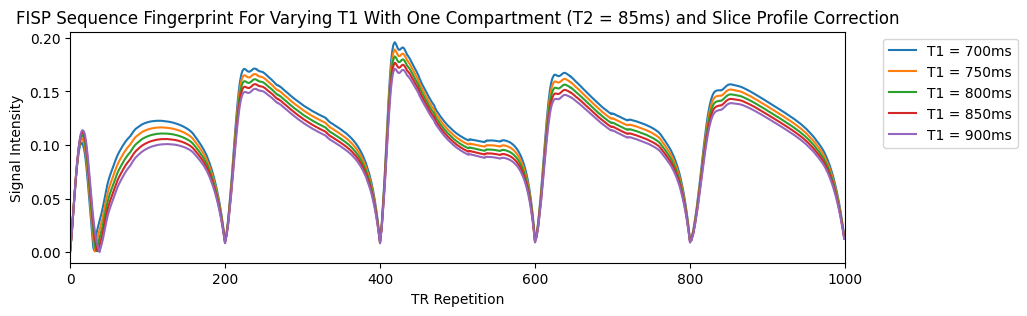

In [80]:
# Read in sequence data
sequence_T1_700 = np.load('DictionaryFISP/echo_700_700_200_1.0_1.0_1.npy')
sequence_T1_750 = np.load('DictionaryFISP/echo_750_750_200_1.0_1.0_1.npy')
sequence_T1_800 = np.load('DictionaryFISP/echo_800_800_200_1.0_1.0_1.npy')
sequence_T1_850 = np.load('DictionaryFISP/echo_850_850_200_1.0_1.0_1.npy')
sequence_T1_900 = np.load('DictionaryFISP/echo_900_900_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(sequence_T1_700/6000, label='T1 = 700ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T1_750/6000, label='T1 = 750ms') 
plt.plot(sequence_T1_800/6000, label='T1 = 800ms') 
plt.plot(sequence_T1_850/6000, label='T1 = 850ms') 
plt.plot(sequence_T1_900/6000, label='T1 = 900ms') 

plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms) and Slice Profile Correction')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])



(0.0, 1000.0)

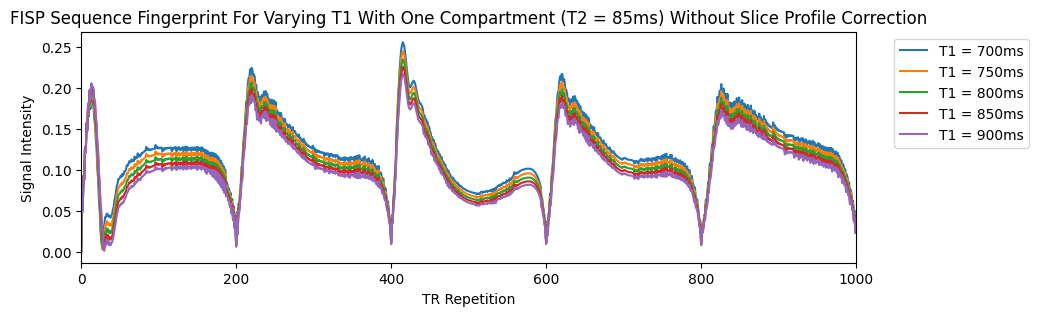

In [83]:
# Read in sequence data
noSC_sequence_T1_700 = np.load('DictionaryFISPNoSliceCor/echo_700_700_85_85_200_1.0_1.0_1.npy')
noSC_sequence_T1_750 = np.load('DictionaryFISPNoSliceCor/echo_750_750_85_85_200_1.0_1.0_1.npy')
noSC_sequence_T1_800 = np.load('DictionaryFISPNoSliceCor/echo_800_800_85_85_200_1.0_1.0_1.npy')
noSC_sequence_T1_850 = np.load('DictionaryFISPNoSliceCor/echo_850_850_85_85_200_1.0_1.0_1.npy')
noSC_sequence_T1_900 = np.load('DictionaryFISPNoSliceCor/echo_900_900_85_85_200_1.0_1.0_1.npy')

plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph
plt.plot(noSC_sequence_T1_700/6000, label='T1 = 700ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(noSC_sequence_T1_750/6000, label='T1 = 750ms') 
plt.plot(noSC_sequence_T1_800/6000, label='T1 = 800ms') 
plt.plot(noSC_sequence_T1_850/6000, label='T1 = 850ms') 
plt.plot(noSC_sequence_T1_900/6000, label='T1 = 900ms') 

plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T1 With One Compartment (T2 = 85ms) Without Slice Profile Correction')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlim([0,1000])



(0.0, 0.2)

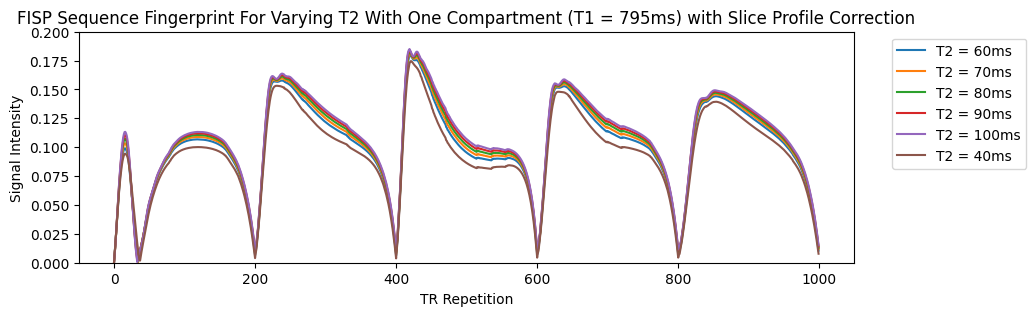

In [7]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISP/echo_795_795_60_60_200_1.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISP/echo_795_795_70_70_200_1.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISP/echo_795_795_80_80_200_1.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISP/echo_795_795_90_90_200_1.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISP/echo_795_795_100_100_200_1.0_1.0_1.npy')
sequence_T2_40 = np.load('DictionaryFISP/echo_800_800_40_40_200_1.0_1.0_1.npy')


plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph

plt.plot(sequence_T2_60/6000, label='T2 = 60ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_70/6000, label='T2 = 70ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_80/6000, label='T2 = 80ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_90/6000, label='T2 = 90ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_100/6000, label='T2 = 100ms') # divide by 6000 to obtain same scale as Jiang paper



plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms) with Slice Profile Correction')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.ylim([0,0.2])


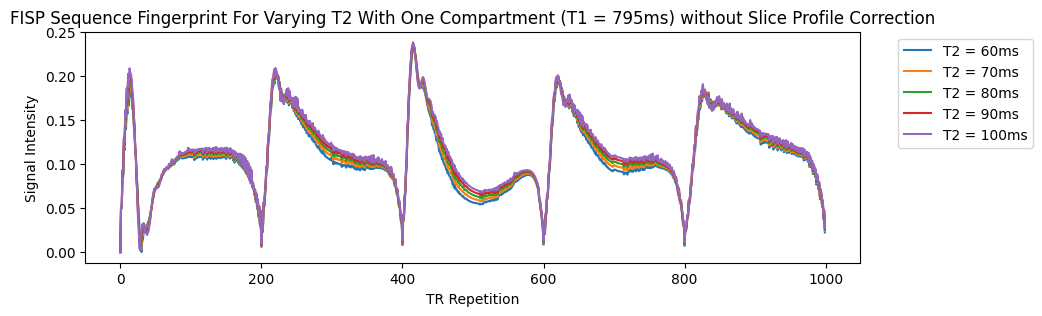

In [87]:
# Read in sequence data
sequence_T2_60 = np.load('DictionaryFISPNoSliceCor/echo_795_795_60_60_200_1.0_1.0_1.npy')
sequence_T2_70 = np.load('DictionaryFISPNoSliceCor/echo_795_795_70_70_200_1.0_1.0_1.npy')
sequence_T2_80 = np.load('DictionaryFISPNoSliceCor/echo_795_795_80_80_200_1.0_1.0_1.npy')
sequence_T2_90 = np.load('DictionaryFISPNoSliceCor/echo_795_795_90_90_200_1.0_1.0_1.npy')
sequence_T2_100 = np.load('DictionaryFISPNoSliceCor/echo_795_795_100_100_200_1.0_1.0_1.npy')


plt.rcParams['figure.figsize'] = [10, 3]
# Plot the sequence on line graph

plt.plot(sequence_T2_60/6000, label='T2 = 60ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_70/6000, label='T2 = 70ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_80/6000, label='T2 = 80ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_90/6000, label='T2 = 90ms') # divide by 6000 to obtain same scale as Jiang paper
plt.plot(sequence_T2_100/6000, label='T2 = 100ms') # divide by 6000 to obtain same scale as Jiang paper


plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint For Varying T2 With One Compartment (T1 = 795ms) without Slice Profile Correction')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")



Messed up below if you follow the FISP sequence from https://mriquestions.com/grassfisp-how.html, need to have gradients like in Jiang paper

Text(0.5, 1.0, 'FISP Sequence Fingerprint T1 = 700, T2 = 85ms')

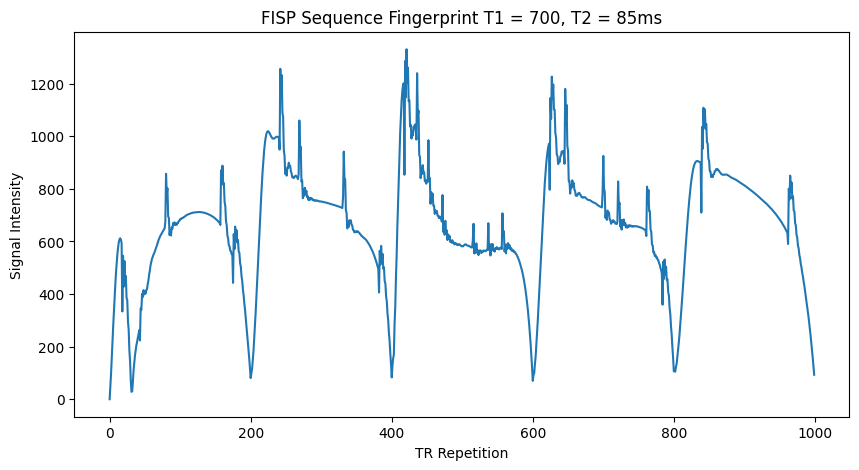

In [29]:
plt.rcParams['figure.figsize'] = [10, 5]
# Plot the sequence on line graph
plt.plot(sequence)
plt.xlabel('TR Repetition')
plt.ylabel('Signal Intensity')
plt.title('FISP Sequence Fingerprint T1 = 700, T2 = 85ms')


Text(1.185, 0.13, '$\\it{T}_{2}$ = 85ms')

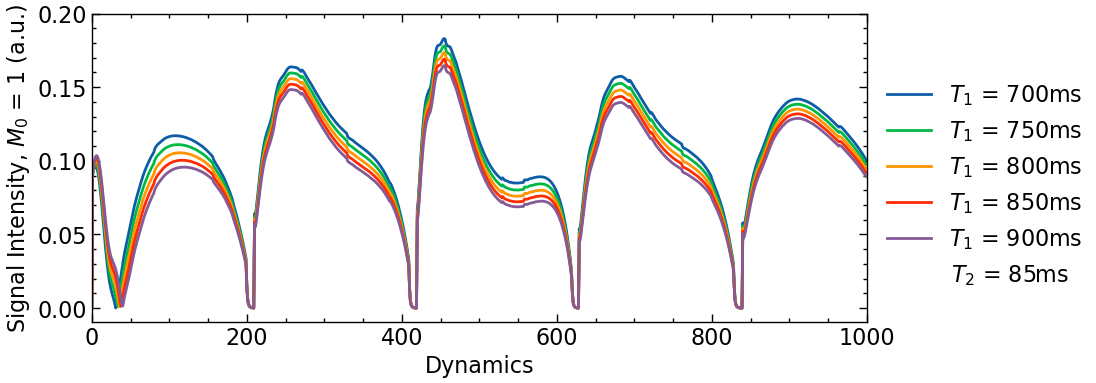

In [66]:
# Read in sequence data
sequence_T1_700 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig/echo_700_700_85_85_200_0.0_1.0_1.npy') 
sequence_T1_750 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig/echo_750_750_85_85_200_0.0_1.0_1.npy')
sequence_T1_800 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig/echo_800_800_85_85_200_0.0_1.0_1.npy')
sequence_T1_850 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig/echo_850_850_85_85_200_0.0_1.0_1.npy')
sequence_T1_900 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig/echo_900_900_85_85_200_0.0_1.0_1.npy')

import scienceplots

plt.style.use(['science','notebook'])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
# Plot the sequence on line graph
plt.plot(sequence_T1_700/10000, label='$\it{T}_{1}$ = 700ms') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T1_750/10000, label='$\it{T}_{1}$ = 750ms') 
plt.plot(sequence_T1_800/10000, label='$\it{T}_{1}$ = 800ms') 
plt.plot(sequence_T1_850/10000, label='$\it{T}_{1}$ = 850ms') 
plt.plot(sequence_T1_900/10000, label='$\it{T}_{1}$ = 900ms') 


plt.xlabel('Dynamics')
plt.ylabel('Signal Intensity, $\it{M}_{0}$ = 1 (a.u.)')
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 12 })
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim = ([0,0.15])
plt.yticks([0.000,0.05, 0.1, 0.15, 0.2])
plt.xlim([0,1000])
plt.text(1.185, 0.13, '$\it{T}_{2}$ = 85ms', fontsize=16, ha='center', transform=plt.gca().transAxes)

Text(1.185, 0.13, '$\\it{T}_{2}$ = 85ms')

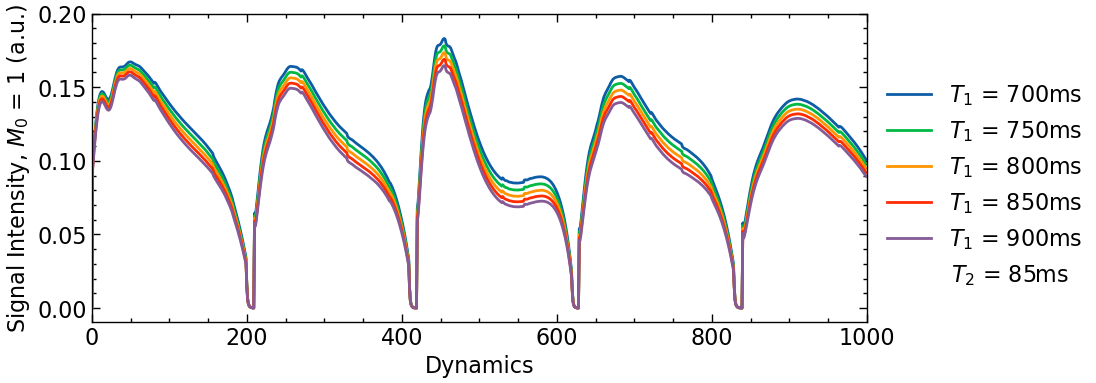

In [65]:
# Read in sequence data
sequence_T1_700d = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig_null/echo_700_700_85_85_200_0.0_1.0_1.npy') 
sequence_T1_750 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig_null/echo_750_750_85_85_200_0.0_1.0_1.npy')
sequence_T1_800 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig_null/echo_800_800_85_85_200_0.0_1.0_1.npy')
sequence_T1_850 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig_null/echo_850_850_85_85_200_0.0_1.0_1.npy')
sequence_T1_900 = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig_null/echo_900_900_85_85_200_0.0_1.0_1.npy')
sequence_CSF =  np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionaryFISP_orig_null/echo_4500_4500_85_85_200_0.0_1.0_1.npy')
import scienceplots

plt.style.use(['science','notebook'])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
# Plot the sequence on line graph
plt.plot(sequence_T1_700d/10000, label='$\it{T}_{1}$ = 700ms') # divide by 10000 to obtain same scale as Jiang paper (normalised)
plt.plot(sequence_T1_750/10000, label='$\it{T}_{1}$ = 750ms') 
plt.plot(sequence_T1_800/10000, label='$\it{T}_{1}$ = 800ms') 
plt.plot(sequence_T1_850/10000, label='$\it{T}_{1}$ = 850ms') 
plt.plot(sequence_T1_900/10000, label='$\it{T}_{1}$ = 900ms') 
#plt.plot(sequence_CSF/10000)


plt.xlabel('Dynamics')
plt.ylabel('Signal Intensity, $\it{M}_{0}$ = 1 (a.u.)')
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2), ncol=5, prop = { "size": 12 })
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim = ([0,0.15])
plt.yticks([0.000,0.05, 0.1, 0.15, 0.2])
plt.xlim([0,1000])
plt.text(1.185, 0.13, '$\it{T}_{2}$ = 85ms', fontsize=16, ha='center', transform=plt.gca().transAxes)

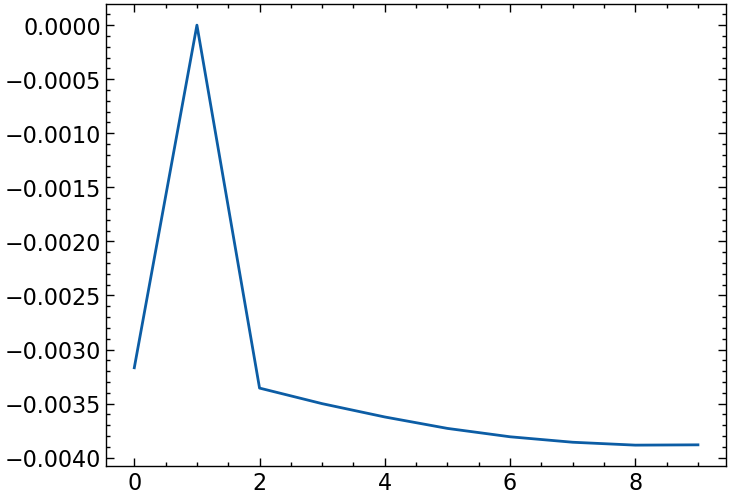

In [42]:
plt.plot(((sequence_T1_700c/10000)-(sequence_T1_700a/10000))[:10])

Optimal Sequence testing

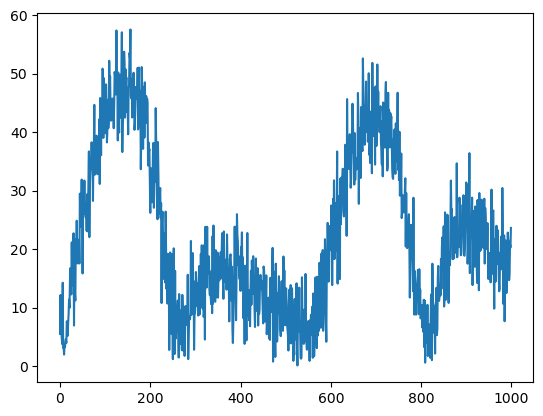

In [33]:
a = np.load('DictionaryDiscard/echo_1000_1500_200_1.0_0.8_50.npy')
plt.plot(a[:, 49, 4])


43.76606912157909
0.00040625915664160606


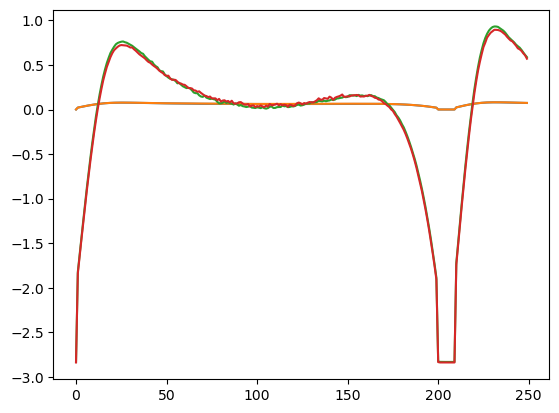

In [22]:
plt.plot(a[:250]/np.linalg.norm(b[:250]))
plt.plot(b[:250]/np.linalg.norm(b[:250]))

normalized_a = (a - np.mean(a)) / np.std(a)
normalized_b = (b-np.mean(b))/np.std(b)

plt.plot(normalized_a[:250])
plt.plot(normalized_b[:250])


from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(a,b))
print(root_mean_squared_error(a/np.linalg.norm(b),b/np.linalg.norm(b)))

In [17]:
np.linalg.norm(b)

107729.43429356022

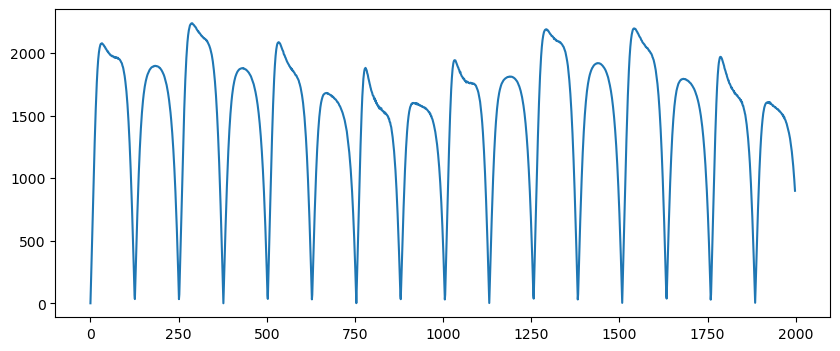

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

testing = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionarySPGRE_WEX_upgrade/echo_1000.0_1500.0_200.0_1.0_0.8_1.npy')
# paper fingerprint:
#testing = np.load('/Users/ela/Documents/PhD/code/MRFSGRE_BBB/dictionaries/DictionarySPGRE_WEX_upgrade/echo_1300.0_1700.0_200.0_4.0_1.0_1.npy')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.plot(np.linalg.norm(testing, axis=1)[1:])